# **Ecar_ETL+Model**

## Objectives

* Input raw data from Kaggle and other public sources, analyse, calculate cost and CO2 savings for different electric cars for use in a Power BI dashboard.

## Inputs

* Techno-economic information for electric cars (prices, mileage capacity, electrical efficiency etc.)
Other background information on competing petrol cars, interest rates, carbon intensity of electricity and petrol etc.

## Outputs

* A csv file containing all cost and CO2 savings results and underlying data to facilitate visualisation in a Power BI dashboard which enables a user to select various different scenarios on numerous variables such as annual mileage and range, whether a home charger is possible, whether the car is new or used and numerous other variations.

## Additional Comments

* Much of the ideation was done in Microsoft Excel before replicating and expanding it here.  This provided a quick way to ideate and a useful cross check on results here.



# Section 0 Initial setup, check Python version, set working directory and import Python libraries.

In [1]:
#Check Python version
! python --version

Python 3.12.8


---

In [2]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\jerem\\OneDrive\\Documents\\CodeInstitute\\vscode-projects\\Capstone_Evaluating_Domestic_Electrification_Measures\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [3]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [4]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\jerem\\OneDrive\\Documents\\CodeInstitute\\vscode-projects\\Capstone_Evaluating_Domestic_Electrification_Measures'

Import necessary Python Packages

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap as tw

# Section 1 Importing, cleaning and examining main dataset.

Below I read 2023 car database data obtained from Kaggle at
https://www.kaggle.com/datasets/kkhandekar/cheapest-electric-cars

which itself was scraped in 2023 from 
https://ev-database.org/ which appears to have more up to date data.

I had insufficient time to update with latest data from https://ev-database.org, but this would be a key future improvement as ecars are fast improving in price, technology and UK availability.  So the overall cost savings I calculate below are likely to be conservative, but I anticipate will still show more potential total cost savings for Ecars than for Solar PV or ASHPs.  If this is not the case I shall attempt to derive and apply an adjustment factor to costs based on the ratio of current costs to costs in the above database for a sample of Ecars still on sale today to make any comparisons with Solar PV and heat pumps fairer.

It should be noted here that, as stated elsewhere, I will calculate cost and CO2 savings based on linear regression or averaged cost and technical information for various mileage range intervals, e.g. 50-75 miles, rather than for individual cars to avoid potentially implying a particular car has the best cost saving which could have legal implications and is likely to be unfair given the age of the above dataset and the fact other assumptions have not been peer reviewed.

In [6]:
df_ecars = pd.read_csv('Data/1_Raw/Cheapestelectriccars-EVDatabase_2023.csv')
df_ecars

,Name,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK
0,Lucid Air Dream Edition P,118 kWh useable battery Available sin...,2.7 sec,270 km/h,645 km,183 Wh/km,820 km/h,All Wheel Drive,5,"€218,000",NaN
1,Porsche Taycan Turbo S,83.7 kWh useable battery Available si...,2.8 sec,260 km/h,400 km,209 Wh/km,980 km/h,All Wheel Drive,4,"€189,668","£142,400"
2,Audi e-tron GT RS,85 kWh useable battery Available sinc...,3.3 sec,250 km/h,405 km,210 Wh/km,1000 km/h,All Wheel Drive,4,"€146,050","£115,000"
3,Renault Zoe ZE50 R110,52 kWh useable battery Available sinc...,11.4 sec,135 km/h,315 km,165 Wh/km,230 km/h,Front Wheel Drive,5,"€36,840",NaN
4,Audi Q4 e-tron 35,52 kWh useable battery Available sinc...,9.0 sec,160 km/h,285 km,182 Wh/km,360 km/h,Rear Wheel Drive,5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
304,Volkswagen ID.7 Pro,77 kWh useable battery Expected from ...,8.0 sec,180 km/h,470 km,164 Wh/km,700 km/h,Rear Wheel Drive,5,"€55,000","£53,000"
305,Volkswagen ID.7 Pro S,86 kWh useable battery Expected from ...,7.0 sec,180 km/h,520 km,165 Wh/km,800 km/h,Rear Wheel Drive,5,"€60,000","£56,000"
306,Polestar 4 Long Range Single Motor,94 kWh useable battery Expected from ...,7.4 sec,180 km/h,510 km,184 Wh/km,760 km/h,Rear Wheel Drive,5,"€60,000","£55,000"
307,Polestar 4 Long Range Dual Motor,94 kWh useable battery Expected from ...,3.8 sec,200 km/h,475 km,198 Wh/km,710 km/h,All Wheel Drive,5,"€65,000","£60,000"


Below, I tried to amend column headings to increase number of columns which can be read without need to scroll to the right, but was unable to get this to work. Future learning.

In [7]:
# Below, I tried to amend column headings to increase number of columns which can be read on single screen without need to 
# scroll but was unable to get this to work, code below literally adds the text '\n' into the headings. Future learning.

# df_ecars.columns = [
#     "\n".join(tw.wrap(col, width=10))
#     for col in df_ecars.columns
# ]
# df_ecars

View ecars column info and null and non-null counts.

In [8]:
df_ecars.info()
null_counts_per_column = df_ecars.isna().sum()
print("\nNull count per column:")
print(null_counts_per_column)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             309 non-null    object
 1   Subtitle         309 non-null    object
 2   Acceleration     309 non-null    object
 3   TopSpeed         309 non-null    object
 4   Range            309 non-null    object
 5   Efficiency       309 non-null    object
 6   FastChargeSpeed  309 non-null    object
 7   Drive            309 non-null    object
 8   NumberofSeats    309 non-null    int64 
 9   PriceinGermany   282 non-null    object
 10  PriceinUK        198 non-null    object
dtypes: int64(1), object(10)
memory usage: 26.7+ KB

Null count per column:
Name                 0
Subtitle             0
Acceleration         0
TopSpeed             0
Range                0
Efficiency           0
FastChargeSpeed      0
Drive                0
NumberofSeats        0
PriceinGermany      27
Pric

So UK price, battery size (called "Subtitle above") and Range are all non numerical, containing a mix of text and numbers, from which the numerical data will need to be extracted into new numerical format columns to be of use in the analysis. But only 198 of the 309 Ecars in the database have UK prices.

So 111 of these cars have no UK prices and the data won"t be of use in calculating total cost savings. I checked a few such cars online and indeed some are not for sale in the UK. Others are so I began investigating missing prices for some, e.g. for the Dacia Spring which is the cheapest electric car now (October 2025) on sale in the UK, as I thought it would be useful to include these in the dataset, but while doing so observed others have come down in price so adding the Dacia Spring and possibly changing a few prices observed along the way would be inconsistent with using 2023 data elsewhere, so I decided to omit this step for consistency.  As stated above ideally the whole dataset would be refreshed with more up to date UK Ecar data when time allows after this project.

Below I have removed rows with no UK costs. 

In [9]:
df_ecars = df_ecars.dropna(subset=['PriceinUK'])

df_ecars.info()
null_counts_per_column = df_ecars.isna().sum()
print('\nNull values per column:')
print(null_counts_per_column)
df_ecars

<class 'pandas.core.frame.DataFrame'>
Index: 198 entries, 1 to 308
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             198 non-null    object
 1   Subtitle         198 non-null    object
 2   Acceleration     198 non-null    object
 3   TopSpeed         198 non-null    object
 4   Range            198 non-null    object
 5   Efficiency       198 non-null    object
 6   FastChargeSpeed  198 non-null    object
 7   Drive            198 non-null    object
 8   NumberofSeats    198 non-null    int64 
 9   PriceinGermany   189 non-null    object
 10  PriceinUK        198 non-null    object
dtypes: int64(1), object(10)
memory usage: 18.6+ KB

Null values per column:
Name               0
Subtitle           0
Acceleration       0
TopSpeed           0
Range              0
Efficiency         0
FastChargeSpeed    0
Drive              0
NumberofSeats      0
PriceinGermany     9
PriceinUK          0
dtype: 

,Name,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK
1,Porsche Taycan Turbo S,83.7 kWh useable battery Available si...,2.8 sec,260 km/h,400 km,209 Wh/km,980 km/h,All Wheel Drive,4,"€189,668","£142,400"
2,Audi e-tron GT RS,85 kWh useable battery Available sinc...,3.3 sec,250 km/h,405 km,210 Wh/km,1000 km/h,All Wheel Drive,4,"€146,050","£115,000"
5,Tesla Model Y Performance,75 kWh useable battery Available sinc...,3.7 sec,250 km/h,415 km,181 Wh/km,640 km/h,All Wheel Drive,5,"€63,667","£59,990"
6,Porsche Taycan 4 Cross Turismo,83.7 kWh useable battery Available si...,5.1 sec,220 km/h,425 km,197 Wh/km,1050 km/h,All Wheel Drive,4,"€98,514","£84,500"
7,Renault Zoe ZE50 R135,52 kWh useable battery Available sinc...,9.5 sec,140 km/h,310 km,168 Wh/km,230 km/h,Front Wheel Drive,5,"€37,840","£29,995"
...,...,...,...,...,...,...,...,...,...,...,...
304,Volkswagen ID.7 Pro,77 kWh useable battery Expected from ...,8.0 sec,180 km/h,470 km,164 Wh/km,700 km/h,Rear Wheel Drive,5,"€55,000","£53,000"
305,Volkswagen ID.7 Pro S,86 kWh useable battery Expected from ...,7.0 sec,180 km/h,520 km,165 Wh/km,800 km/h,Rear Wheel Drive,5,"€60,000","£56,000"
306,Polestar 4 Long Range Single Motor,94 kWh useable battery Expected from ...,7.4 sec,180 km/h,510 km,184 Wh/km,760 km/h,Rear Wheel Drive,5,"€60,000","£55,000"
307,Polestar 4 Long Range Dual Motor,94 kWh useable battery Expected from ...,3.8 sec,200 km/h,475 km,198 Wh/km,710 km/h,All Wheel Drive,5,"€65,000","£60,000"


And below I have converted UK prices to integers to allow processing as numbers after £ sign are all integers.  Then apply £ and comma seperated format. I tried different ways of extracting the numerical data from the source column and creating the new numerical text column. Both methods give the same result which I have checked as being correct, but also the same SettingWithCopyWarnings.  The second method is what I understand to be the .loc method suggested in the warning text and still raises the same warnings.  I do not understand the error message but am happy the result is correct.

In [10]:
# df_ecars['UKPrice_£'] = df_ecars['PriceinUK'].str.replace('£', '').str.replace(',', '').astype('Int64')

# Gives correct result (I've checked for all rows) but SettingWithCopyWarnings below.

df_ecars.loc[:, 'UKPrice_£'] = df_ecars['PriceinUK'].str.replace('£', '').str.replace(',', '').astype('Int64')

# This alternative seems to be in line with suggested code in the SettingWithCopyWarnings below 
# Gives correct result (I've checked by displaying all rows and observing) but gives same SettingWithCopyWarnings.

df_ecars[['PriceinUK', 'UKPrice_£']].info()

# pd.set_option('display.max_rows', 200) 
# Above temporarily enacted above to check correct result for all rows following the 
# SettingWithCopyWarnings before commenting it out and rerunning to truncate the display.
df_ecars[['PriceinUK', 'UKPrice_£']]

<class 'pandas.core.frame.DataFrame'>
Index: 198 entries, 1 to 308
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   PriceinUK  198 non-null    object
 1   UKPrice_£  198 non-null    Int64 
dtypes: Int64(1), object(1)
memory usage: 4.8+ KB


C:\Users\jerem\AppData\Local\Temp\ipykernel_15180\3863975843.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ecars.loc[:, 'UKPrice_£'] = df_ecars['PriceinUK'].str.replace('£', '').str.replace(',', '').astype('Int64')


,PriceinUK,UKPrice_£
1,"£142,400",142400
2,"£115,000",115000
5,"£59,990",59990
6,"£84,500",84500
7,"£29,995",29995
...,...,...
304,"£53,000",53000
305,"£56,000",56000
306,"£55,000",55000
307,"£60,000",60000


I tried different ways of extracting the numerical data from the source column and creating the new numerical text column. All methods give the same result which I have checked as being correct, but also giving the same copysettings warning, including the .loc method suggested in the warning text.  I do not understand the error message but am happy the result is correct.

I then extracted range km number from the strings in the 'Range' column, sort table in ascending range order and calculate range in mi also, rounding to integers as km are integers.

In [11]:

# df_ecars['Range_km'] = df_ecars['Range'].str.split(' ').str[0].astype('Int64') 
# df_ecars['Range_km'] = df_ecars['Range'].str.replace(' km', '').astype('int64')
df_ecars.loc[:, 'Range_km'] = df_ecars['Range'].str.replace(' km', '').astype('Int64')

# All three alternatives give correct result (I've checked by displaying all rows and observing) but same SettingWithCopyWarnings.
# Third alternative above seems to be in line with suggested code in the SettingWithCopyWarnings below 
# but still gives same SettingWithCopyWarnings.

df_ecars[['Range', 'Range_km']].info()

# pd.set_option('display.max_rows', 200) 
# Above temporarily enacted above to check correct result for all rows following the 
# SettingWithCopyWarnings before commenting it out and rerunning to truncate the display.
df_ecars[['Range', 'Range_km']]

<class 'pandas.core.frame.DataFrame'>
Index: 198 entries, 1 to 308
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Range     198 non-null    object
 1   Range_km  198 non-null    Int64 
dtypes: Int64(1), object(1)
memory usage: 4.8+ KB


C:\Users\jerem\AppData\Local\Temp\ipykernel_15180\4186741623.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ecars.loc[:, 'Range_km'] = df_ecars['Range'].str.replace(' km', '').astype('Int64')


,Range,Range_km
1,400 km,400
2,405 km,405
5,415 km,415
6,425 km,425
7,310 km,310
...,...,...
304,470 km,470
305,520 km,520
306,510 km,510
307,475 km,475


I found that subsequent use of my new numerical columns extracted from strings above kept resulting in the same copysettings warnings which is unnecessary as I am happy these new numerical columns are correct.  Options to stop these messages appearing subsequently are either
1. To suppress the messages with ```pd.options.mode.chained_assignment = None```
2. To make a copy of the dataframe so far with it's new numerical columns ```df_ecars=df_ecars.copy()```

I have adopted the latter approach below as it leaves the default warning on, so I can check results if this warning results from any new code moving forward.

In [12]:
df_ecars = df_ecars.copy()  
# To avoid SettingWithCopyWarning in subsequent operations on new columns created above the creation of which raised the warnings.
# Also seems to stop the warnings reappearing when generating further numberical columns from strings in a similar way
# e.g. creation of battery_kWh from 'subtitle' column below.

I have sorted table in ascending range order and calculated a new column with range in miles.

In [13]:
df_ecars.sort_values(by='Range_km', inplace=True)
df_ecars.reset_index(drop=True, inplace=True)
df_ecars['Range_mi']= (df_ecars['Range_km']/1.60934).astype('float')
df_ecars[['Range', 'Range_km', 'Range_mi']].info()
df_ecars[['Range_km', 'Range_mi']].describe()
df_ecars[['Range', 'Range_km', 'Range_mi']]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Range     198 non-null    object 
 1   Range_km  198 non-null    Int64  
 2   Range_mi  198 non-null    float64
dtypes: Int64(1), float64(1), object(1)
memory usage: 5.0+ KB


,Range,Range_km,Range_mi
0,170 km,170,105.633365
1,170 km,170,105.633365
2,170 km,170,105.633365
3,180 km,180,111.847093
4,180 km,180,111.847093
...,...,...,...
193,525 km,525,326.220687
194,550 km,550,341.755005
195,565 km,565,351.075596
196,570 km,570,354.182460


I have created a new 'Battery_kWh' column using numerical information extracted from original column headed 'Subtitle'.

In [14]:
df_ecars['Battery_kWh'] = df_ecars['Subtitle'].str.split(' ').str[0].astype('float')
df_ecars['Battery_kWh'].describe()
df_ecars[['Subtitle', 'Battery_kWh']]

,Subtitle,Battery_kWh
0,28.9 kWh useable battery Available si...,28.9
1,28.5 kWh useable battery Available si...,28.5
2,30 kWh useable battery Available sinc...,30.0
3,46.3 kWh useable battery Available si...,46.3
4,46.3 kWh useable battery Available si...,46.3
...,...,...
193,106 kWh useable battery Available sin...,106.0
194,95 kWh useable battery Available sinc...,95.0
195,107.8 kWh useable battery Available s...,107.8
196,95 kWh useable battery Available sinc...,95.0


Convert 'Efficiency' from text to kWh/km and check that it is similar to Battery_kWh/Range_km. The expected ratio between the two is 1.

In [15]:
df_ecars['Efficiency*1000'] = df_ecars['Efficiency'].str.split(' Wh').str[0].astype('float')/1000
df_ecars['Battery_kWh/Range_km']= (df_ecars['Battery_kWh']/df_ecars['Range_km']).round(3)
df_ecars['Efficiency_ratio'] = (df_ecars['Efficiency*1000']/df_ecars['Battery_kWh/Range_km'])
df_ecars[['Efficiency*1000', 'Battery_kWh/Range_km', 'Efficiency_ratio']].head(20)

,Efficiency*1000,Battery_kWh/Range_km,Efficiency_ratio
0,0.170,0.17,1.0
1,0.168,0.168,1.0
2,0.176,0.176,1.0
3,0.257,0.257,1.0
4,0.257,0.257,1.0
5,0.257,0.257,1.0
6,0.257,0.257,1.0
7,0.257,0.257,1.0
8,0.161,0.161,1.0
9,0.250,0.25,1.0


In [16]:
df_ecars.info()
df_ecars['Efficiency_ratio'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  198 non-null    object 
 1   Subtitle              198 non-null    object 
 2   Acceleration          198 non-null    object 
 3   TopSpeed              198 non-null    object 
 4   Range                 198 non-null    object 
 5   Efficiency            198 non-null    object 
 6   FastChargeSpeed       198 non-null    object 
 7   Drive                 198 non-null    object 
 8   NumberofSeats         198 non-null    int64  
 9   PriceinGermany        189 non-null    object 
 10  PriceinUK             198 non-null    object 
 11  UKPrice_£             198 non-null    Int64  
 12  Range_km              198 non-null    Int64  
 13  Range_mi              198 non-null    float64
 14  Battery_kWh           198 non-null    float64
 15  Efficiency*1000       1

Efficiency_ratio
1.0         192
1.004329      3
1.005208      2
1.005236      1
Name: count, dtype: Int64

So the 'efficiency', battery capacity and range given in original dataset tie together well aside from a few minor anomalies, likely due to rounding.  So I will just use Battery_kwh and Range_km moving forward to calculate miles_per_kWh (akin to petrol miles per gallon) for analysis.

In [17]:
df_ecars['Efficiency_mi/kWh'] = (df_ecars['Range_mi']/df_ecars['Battery_kWh'])
pd.set_option('display.max_rows', 20)
df_ecars.info()
df_ecars[['Efficiency_mi/kWh']]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  198 non-null    object 
 1   Subtitle              198 non-null    object 
 2   Acceleration          198 non-null    object 
 3   TopSpeed              198 non-null    object 
 4   Range                 198 non-null    object 
 5   Efficiency            198 non-null    object 
 6   FastChargeSpeed       198 non-null    object 
 7   Drive                 198 non-null    object 
 8   NumberofSeats         198 non-null    int64  
 9   PriceinGermany        189 non-null    object 
 10  PriceinUK             198 non-null    object 
 11  UKPrice_£             198 non-null    Int64  
 12  Range_km              198 non-null    Int64  
 13  Range_mi              198 non-null    float64
 14  Battery_kWh           198 non-null    float64
 15  Efficiency*1000       1

,Efficiency_mi/kWh
0,3.655134
1,3.706434
2,3.521112
3,2.415704
4,2.415704
...,...
193,3.077554
194,3.597421
195,3.256731
196,3.728236


I have created a new column which = total of 10^9 * car range_mi, 1000 * UKPrice_£, Battery_kWh and index to facilitate a sort of all Ecars from smallest to largest which I've defined by ascending order of range then price then battery size and then index.  Then assigned a new index.

In [18]:
df_ecars['RangeBatterySizeIndexConcatanate'] = 1000000000 * df_ecars['Range_mi'] + 1000 * df_ecars['UKPrice_£'] + df_ecars['Battery_kWh'] + df_ecars.index
df_ecars = df_ecars.sort_values(by='RangeBatterySizeIndexConcatanate', ascending=True)
df_ecars.reset_index(drop=True, inplace=True)
df_ecars

,Name,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK,UKPrice_£,Range_km,Range_mi,Battery_kWh,Efficiency*1000,Battery_kWh/Range_km,Efficiency_ratio,Efficiency_mi/kWh,RangeBatterySizeIndexConcatanate
0,Mazda MX-30,30 kWh useable battery Available sinc...,9.7 sec,140 km/h,170 km,176 Wh/km,210 km/h,Front Wheel Drive,5,"€35,990","£30,050",30050,170,105.633365,30.0,0.176,0.176,1.0,3.521112,105663415262.467148
1,Honda e Advance,28.5 kWh useable battery Available si...,8.3 sec,145 km/h,170 km,168 Wh/km,180 km/h,Rear Wheel Drive,4,"€39,900","£36,920",36920,170,105.633365,28.5,0.168,0.168,1.0,3.706434,105670285259.967148
2,Mini Cooper SE Convertible,28.9 kWh useable battery Available si...,8.2 sec,150 km/h,170 km,170 Wh/km,240 km/h,Front Wheel Drive,4,"€60,000","£52,500",52500,170,105.633365,28.9,0.170,0.17,1.0,3.655134,105685865259.367142
3,Mini Cooper SE,28.9 kWh useable battery Available si...,7.3 sec,150 km/h,180 km,161 Wh/km,260 km/h,Front Wheel Drive,4,"€35,700","£29,000",29000,180,111.847093,28.9,0.161,0.161,1.0,3.870142,111876092633.865204
4,Citroen e-Jumpy Combi XL 50 kWh,46.3 kWh useable battery Available si...,12.1 sec,130 km/h,180 km,257 Wh/km,290 km/h,Front Wheel Drive,7,"€52,730","£35,995",35995,180,111.847093,46.3,0.257,0.257,1.0,2.415704,111883087647.265213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,Audi Q8 e-tron Sportback 55 quattro,106 kWh useable battery Available sin...,5.6 sec,200 km/h,525 km,202 Wh/km,710 km/h,All Wheel Drive,5,"€87,550","£80,300",80300,525,326.220687,106.0,0.202,0.202,1.0,3.077554,326300987040.14856
194,Tesla Model S Plaid,95 kWh useable battery Available sinc...,2.1 sec,282 km/h,550 km,173 Wh/km,770 km/h,All Wheel Drive,5,"€137,990","£125,000",125000,550,341.755005,95.0,0.173,0.173,1.0,3.597421,341880005446.393738
195,Mercedes EQS AMG 53 4MATIC+,107.8 kWh useable battery Available s...,3.4 sec,250 km/h,565 km,191 Wh/km,840 km/h,All Wheel Drive,5,"€155,009","£161,860",161860,565,351.075596,107.8,0.191,0.191,1.0,3.256731,351237456509.940796
196,Tesla Model S Dual Motor,95 kWh useable battery Available sinc...,3.2 sec,250 km/h,570 km,167 Wh/km,790 km/h,All Wheel Drive,5,"€112,990","£100,000",100000,570,354.182460,95.0,0.167,0.167,1.0,3.728236,354282460181.389832


Reminder of all columns now in dataframe.

In [19]:
df_ecars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Name                              198 non-null    object 
 1   Subtitle                          198 non-null    object 
 2   Acceleration                      198 non-null    object 
 3   TopSpeed                          198 non-null    object 
 4   Range                             198 non-null    object 
 5   Efficiency                        198 non-null    object 
 6   FastChargeSpeed                   198 non-null    object 
 7   Drive                             198 non-null    object 
 8   NumberofSeats                     198 non-null    int64  
 9   PriceinGermany                    189 non-null    object 
 10  PriceinUK                         198 non-null    object 
 11  UKPrice_£                         198 non-null    Int64  
 12  Range_km

I will remove some now redundant columns but retain some for info in case useful for understanding in subsequent analysis, e.g. Name, Acceleration, TopSpeed etc. 

When creating the MatplotLib plot below of price, efficiency and battery size, I tried plotting with the original UK price ('PriceinUK') column on the y-axis as this shows the price in £ and comma seperated format, but this did not plot well so I have also removed this column.

In [20]:
df_ecars.drop(columns=['Subtitle', 'Range', 'Efficiency','PriceinGermany', 'PriceinUK','Range_km','Efficiency*1000', 'Battery_kWh/Range_km', 'Efficiency_ratio', 'RangeBatterySizeIndexConcatanate'], inplace=True)
df_ecars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               198 non-null    object 
 1   Acceleration       198 non-null    object 
 2   TopSpeed           198 non-null    object 
 3   FastChargeSpeed    198 non-null    object 
 4   Drive              198 non-null    object 
 5   NumberofSeats      198 non-null    int64  
 6   UKPrice_£          198 non-null    Int64  
 7   Range_mi           198 non-null    float64
 8   Battery_kWh        198 non-null    float64
 9   Efficiency_mi/kWh  198 non-null    float64
dtypes: Int64(1), float64(3), int64(1), object(5)
memory usage: 15.8+ KB


New index column also added beginning 1, = auto index + 1 and columns rearranged to include more important info on left.

In [21]:
df_ecars['ecarindex'] = df_ecars.index+1
df_ecars.set_index('ecarindex')
df_ecars = df_ecars[['ecarindex', 'Name', 'UKPrice_£','Range_mi','Battery_kWh','Efficiency_mi/kWh','NumberofSeats','TopSpeed','FastChargeSpeed','Drive']]
df_ecars

,ecarindex,Name,UKPrice_£,Range_mi,Battery_kWh,Efficiency_mi/kWh,NumberofSeats,TopSpeed,FastChargeSpeed,Drive
0,1,Mazda MX-30,30050,105.633365,30.0,3.521112,5,140 km/h,210 km/h,Front Wheel Drive
1,2,Honda e Advance,36920,105.633365,28.5,3.706434,4,145 km/h,180 km/h,Rear Wheel Drive
2,3,Mini Cooper SE Convertible,52500,105.633365,28.9,3.655134,4,150 km/h,240 km/h,Front Wheel Drive
3,4,Mini Cooper SE,29000,111.847093,28.9,3.870142,4,150 km/h,260 km/h,Front Wheel Drive
4,5,Citroen e-Jumpy Combi XL 50 kWh,35995,111.847093,46.3,2.415704,7,130 km/h,290 km/h,Front Wheel Drive
...,...,...,...,...,...,...,...,...,...,...
193,194,Audi Q8 e-tron Sportback 55 quattro,80300,326.220687,106.0,3.077554,5,200 km/h,710 km/h,All Wheel Drive
194,195,Tesla Model S Plaid,125000,341.755005,95.0,3.597421,5,282 km/h,770 km/h,All Wheel Drive
195,196,Mercedes EQS AMG 53 4MATIC+,161860,351.075596,107.8,3.256731,5,250 km/h,840 km/h,All Wheel Drive
196,197,Tesla Model S Dual Motor,100000,354.182460,95.0,3.728236,5,250 km/h,790 km/h,All Wheel Drive


Having now partly cleansed the data, I was now ready to start visualising the Ecar data statistically and visually to see how it could be best used to calculate lifetime cost and CO2 savings.
Below I have generated basic statistical info for numerical columns.

In [22]:
df_ecars[['UKPrice_£', 'Range_mi', 'Battery_kWh', 'Efficiency_mi/kWh']].describe()

,UKPrice_£,Range_mi,Battery_kWh,Efficiency_mi/kWh
count,198.0,198.000000,198.000000,198.000000
mean,64255.19697,232.748025,72.565657,3.245323
std,37481.721471,59.496113,19.797757,0.417254
min,25995.0,105.633365,28.500000,2.105763
25%,38876.25,192.625548,57.625000,2.995306
50%,52682.5,242.335367,75.000000,3.267225
75%,76336.5,273.404004,85.000000,3.594766
max,350000.0,397.678551,108.400000,4.106463


Below I have Plotted Range, price, efficiency and battery size to give a visual data overview.

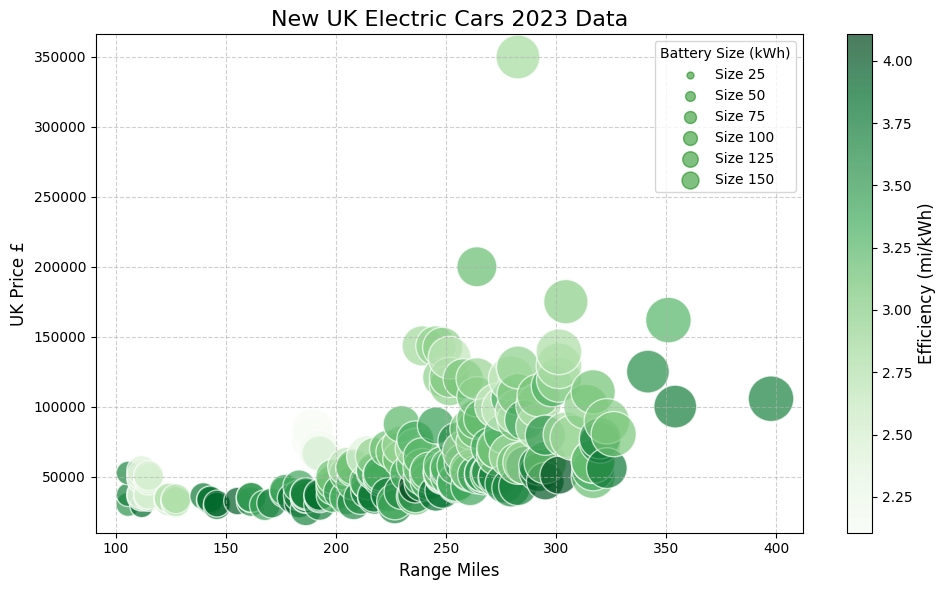

In [23]:
x=df_ecars['Range_mi']
y=df_ecars['UKPrice_£']
sizes=df_ecars['Battery_kWh']*10  # Scale sizes for better visibility
colors=df_ecars['Efficiency_mi/kWh']  # Color by efficiency

plt.figure(figsize=(10, 6))
scatter = plt.scatter(x, y, s=sizes, c=colors, cmap='Greens', alpha=0.7, edgecolors='w')

# Add labels and title
plt.title("New UK Electric Cars 2023 Data", fontsize=16)
plt.xlabel("Range Miles", fontsize=12)
plt.ylabel("UK Price £", fontsize=12)

# Add a color bar to indicate the color mapping
colorbar = plt.colorbar(scatter)
colorbar.set_label("Efficiency (mi/kWh)", fontsize=12)

# Add a legend for marker size
for size in [25, 50, 75, 100, 125, 150]:
    plt.scatter([], [], s=size, c='green', alpha=0.5, label=f"Size {size}")
plt.legend(title="Battery Size (kWh)", loc="upper right")

# Show the plot
plt.grid(True, linestyle='--', alpha=0.6)  # Add a grid for better readability
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()



Can see from the above that as you'd expect in general cars with larger range cost more and have larger batteries, but this trend does not hold well for the lowest range cars where some are considerably dearer than some with conssiderably longer range.
Can also see a mix of higher and lower mi/kWh energy efficiencies across all size ranges i.e. not generally larger for small cars and lower for large cars as might have been anticipated, some larger cars also have good mi/kWh efficiency.
One significant outlier costing £350K and one moderate outlier (£200K) which seem unlikely to result in being shown to be cost effective in subsequent analysis. These are identified immediately below as luxury cars and prices seem reasonable based on manual online research.

Examining cost outliers, it can be seen that these are luxury high power cars and a quick internet search confirmed the prices seem in the right ball park.

In [24]:
df_ecars.sort_values(by=['UKPrice_£'], ascending=[False], inplace=False).head(2)

,ecarindex,Name,UKPrice_£,Range_mi,Battery_kWh,Efficiency_mi/kWh,NumberofSeats,TopSpeed,FastChargeSpeed,Drive
163,164,Rolls-Royce Spectre,350000,282.724595,100.0,2.827246,4,250 km/h,540 km/h,All Wheel Drive
136,137,Maserati GranTurismo Folgore,200000,264.083413,83.0,3.181728,4,320 km/h,990 km/h,All Wheel Drive


My initial intention was to use the above data to calculate the average price, battery size and efficiency for actual individual electric cars in various user range and annual mileage scenarios and show this on dashboards. However on reflection, as mentioned above, I believe presenting lifetime savings for actual Ecars individually could be unfair and have legal implications as my analysis relies on an underlying Kaggle dataset whose data was scraped from an official source in 2023 so now out of date, my modelling relies on other assumptions, has not been independently reviewed and focuses purely on cost and CO2 savings, ignoring performance, reliability, comfort and safety. To reduce this risk, I therefore derived car archetypes based on average values for all individual cars in mileage range bins and calculated the lifetime cost and CO2 savings for car archetypes, rather than actual cars.

For each car archetype, each of the variables, (average price, battery size and efficiency) would either be the average in the range bin or possibly calculated based on a linear regression if it strong correlates with range.

Calculating savings based on archetypes is potentially less accurate so I considered removing the Names, indices and other columns clearly identifying individual cars, calculating cost and CO2 savings for each individual car, aggregating the cost and CO2 savings for range bins and showing only aggregate results on the dashboard which could have resulted in more accurate results. However, the results for individual cars would have then still been visible within this Jupyter notebook which is saved on a public Github repository and the underlying price, range, battery size and efficiency data would either have been displayed to showcase my method or if not, relatively easy for someone to extract with little extra code and these could have been readily used to identify each car. I could also have refrained from displaying the results of various calculation steps in this Jupyter notebook before aggregating or even performing all of these calculations in an offline calculation but this would then have either allowed others to add code lines to extract the data or made it impossible to showcase my method so I did not do so.  

Other advantages of calculating savings based on archetypes rather than individual cars include potentially smoothing out data anomalies, e.g. in the ways manufacturers estimate and/or report mileage range, efficiency etc. and reducing data calculation volume. Regarding the latter, as seen above there are 198 cars and as seen below I have removed just 2 outliers below leaving 196 cars in the analysis. As seen below I created just 9 range archetypes which is considerably less than 196, so this approach had the added benefit of greatly reducing the number of cost and CO2 reductions to be calculated for each user range and annual mileage requirement scenario I considered. 

If doing such a project privately I would probably have calculated the cost and CO2 savings for each car individually before aggregating the results.  A future enhancement of this project would be to do so and statistically compare the results with those obtained using the archetypes as below to see if there is a significant difference.

In order to further visualise the distributions and strength of correlations for price, range, battery size and efficiency to inform the derivation of archetype information, below I have produced pairplots and a correlation matrix for these four numerical variables.

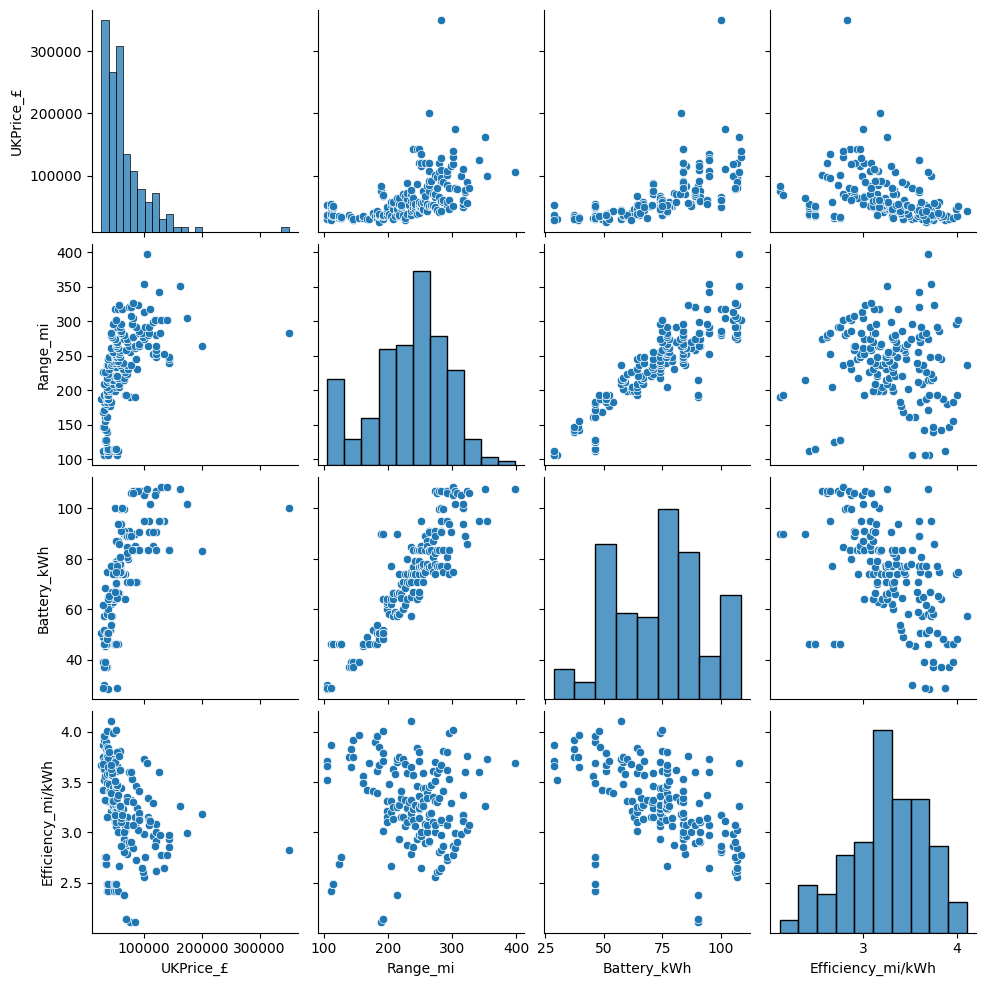

                   UKPrice_£  Range_mi  Battery_kWh  Efficiency_mi/kWh
UKPrice_£              1.000     0.507        0.646             -0.337
Range_mi               0.507     1.000        0.890              0.109
Battery_kWh            0.646     0.890        1.000             -0.335
Efficiency_mi/kWh     -0.337     0.109       -0.335              1.000



In [25]:
# pairplot and correlation matrix to see if any other trends can be observed
sns.pairplot(data=df_ecars[['UKPrice_£','Range_mi','Battery_kWh','Efficiency_mi/kWh']])
plt.show()
correlation_matrix = df_ecars[['UKPrice_£','Range_mi','Battery_kWh','Efficiency_mi/kWh']].corr(method='pearson')
print(f"{correlation_matrix.round(3)}\n")

From the above pairplots and correlation matrix I can see the following:-

The strongest correlation is between battery size and range with a high index of 0.89 and this correlation can be seen visually in the pairplots.

The correlation indices between price and range and between price and battery size are 0.51 and 0.65 respectively which is modest as is reflected visually in the pairplots. Thus it would seem that estimating Price based on range using linear regression is likely to be less accurate than basing it on the average price in cars within range bins.

Efficiency has a weak negative correlation against UKprice and battery size with indices of -0.34 and 
-0.33 respectively indicating a weak trend of more expensive cars and those with larger batteries having lower efficiency but with many exceptions so plenty choice for consumers to select the more efficient options within their price and range requirements.

The correlation between efficiency and range is very weak (index=0.11) and positive rather than negative suggesting higher range does not mean lower efficiency in fact mildly the opposite on average. 

Below, I then examined the distribution of mileage ranges with histograms 50 and 25 mile range bins and a box plot to decide on appropriate bins for developing archetypes and if any outliers should be removed.

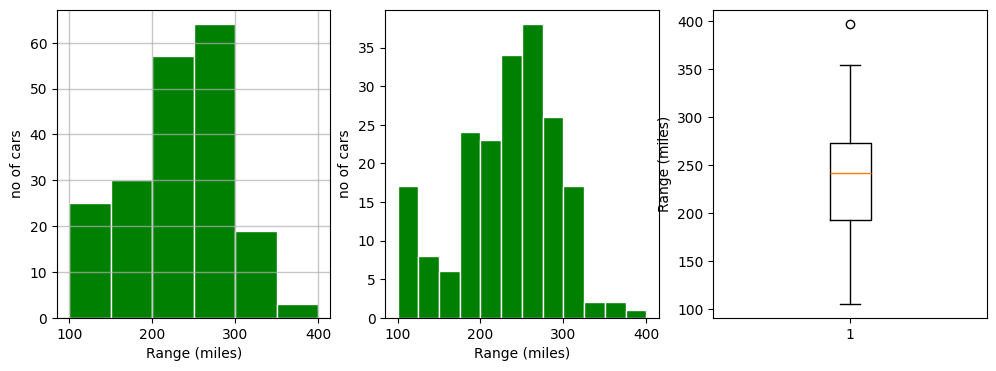


50 mile bins:
            ecar_count
Range_bin             
(100, 150]          25
(150, 200]          30
(200, 250]          57
(250, 300]          64
(300, 350]          19
(350, 400]           3

25 mile bins:
            ecar_count
Range_bin             
(100, 125]          17
(125, 150]           8
(150, 175]           6
(175, 200]          24
(200, 225]          23
(225, 250]          34
(250, 275]          38
(275, 300]          26
(300, 325]          17
(325, 350]           2
(350, 375]           2
(375, 400]           1


In [26]:
# Histograms in different range bin sets and box plot.
plt.figure(figsize=(12, 4))

plt.subplot(1,3,1)
plt.hist(df_ecars['Range_mi'], bins=range(100,425,50), color='green', edgecolor='white')
plt.xlabel("Range (miles)")
plt.ylabel("no of cars")
plt.grid(True, which='both', linestyle='-', linewidth=1, alpha=0.7)

plt.subplot(1,3,2)
plt.hist(df_ecars['Range_mi'], bins=range(100,425,25), color='green', edgecolor='white')
plt.xlabel("Range (miles)")
plt.ylabel("no of cars")

plt.subplot(1,3,3)
plt.boxplot(x=df_ecars['Range_mi'])
plt.ylabel("Range (miles)")
plt.show()

# Car counts in different range bin sets.

df_ecars['Range_bin'] = pd.cut(df_ecars['Range_mi'], bins=range(100, 425, 50))
df_ecar_archetypes = pd.DataFrame()
df_ecar_archetypes['ecar_count'] = df_ecars['ecarindex'].groupby(df_ecars['Range_bin'],observed=True).count()
#observed=True argument added as advised in warning which resulted prior to this change
print(f"\n50 mile bins:\n{df_ecar_archetypes}")

df_ecars['Range_bin'] = pd.cut(df_ecars['Range_mi'], bins=range(100, 425, 25))
df_ecar_archetypes = pd.DataFrame()
df_ecar_archetypes['ecar_count'] = df_ecars['ecarindex'].groupby(df_ecars['Range_bin'],observed=True).count()
#observed=True argument added as advised in warning which resulted prior to this change
print(f"\n25 mile bins:\n{df_ecar_archetypes}")

There is one statistical range outlier seen above the upper whisker on the box plot with a range of just under 400 miles and a further 2 cars with 350-400 miles range, the largest being 354 miles i.e. only just over 350.  I removed these 3 highest range cars from the analysis as the largest range differs considerably from the other 2 cars and modelling either the other 2 cars or all 3 cars as one archetype would make them identifiable with the savings I would calculate.

There are 19 cars with 300-350 miles range but only 2 of these with a 325-350 miles range.  Using 25 mile range bins is more accurate than 50 mile bins but means having only 2 cars with 325-350 miles range which would make them identifiable with the savings I would calculate.  So the choice seemed to be between having 50 mile bins up to 350 miles and lower accuracy or 25 mile bins up to 325 miles and higher accuracy but omitting the 325-350 mile range containing 2 cars as including this would make them identifiable with the savings I would calculate. I chose the latter as this seemed more appropriate.

So in total I would remove the 5 cars with largest mileage range from the analysis.  These are shown below. I have retained them for now to allow a subsequent comparison of correlation matrices.

In [27]:
df_ecars.sort_values(by=['Range_mi'], ascending=[False], inplace=False).head(5)

,ecarindex,Name,UKPrice_£,Range_mi,Battery_kWh,Efficiency_mi/kWh,NumberofSeats,TopSpeed,FastChargeSpeed,Drive,Range_bin
197,198,Mercedes EQS 450+,105610,397.678551,107.8,3.689040,5,210 km/h,960 km/h,Rear Wheel Drive,"(375, 400]"
196,197,Tesla Model S Dual Motor,100000,354.182460,95.0,3.728236,5,250 km/h,790 km/h,All Wheel Drive,"(350, 375]"
195,196,Mercedes EQS AMG 53 4MATIC+,161860,351.075596,107.8,3.256731,5,250 km/h,840 km/h,All Wheel Drive,"(350, 375]"
194,195,Tesla Model S Plaid,125000,341.755005,95.0,3.597421,5,282 km/h,770 km/h,All Wheel Drive,"(325, 350]"
193,194,Audi Q8 e-tron Sportback 55 quattro,80300,326.220687,106.0,3.077554,5,200 km/h,710 km/h,All Wheel Drive,"(325, 350]"


Below I have also examined the ratio of price to mileage range which is likely to be a key factor in determining the likely cost effectiveness of cars to again see the distribution and if there are any outliers which it may be appropriate to remove.

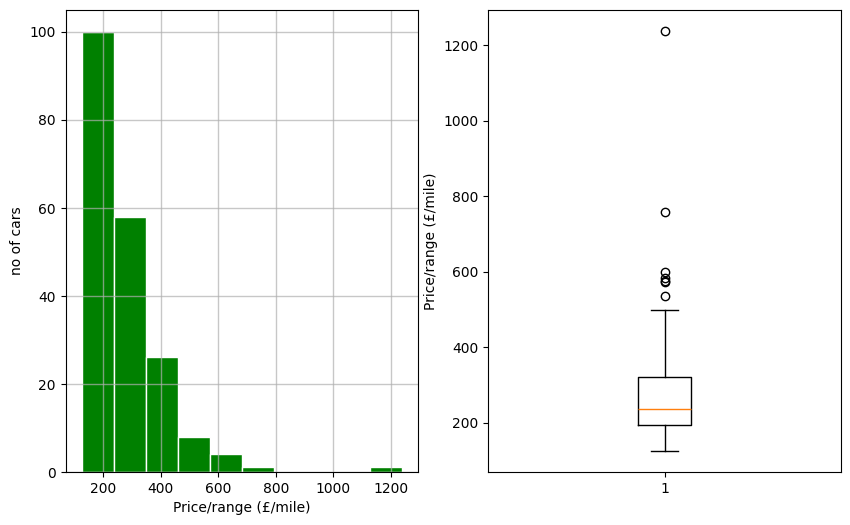

In [28]:
df_ecars['Pricepermilerange'] = df_ecars['UKPrice_£'] / df_ecars['Range_mi']
df_ecars['Pricepermilerange']

#histogram and boxplot of Pricepermilerange to identify outliers
plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
plt.hist(df_ecars['Pricepermilerange'], bins=10, color='green', edgecolor='white')
plt.xlabel("Price/range (£/mile)")
plt.ylabel("no of cars")
plt.grid(True, which='both', linestyle='-', linewidth=1, alpha=0.7)
plt.subplot(1,2,2)
plt.boxplot(x=df_ecars['Pricepermilerange'])
plt.ylabel("Price/range (£/mile)")
plt.show()

There are 2 very clear Pricepermilerange high outliers, but also a small cluster also above the upper box plot whisker (around £500/mi).  I have identified these cars below.

In [29]:
df_ecars.sort_values(by=['Pricepermilerange'], ascending=[False], inplace=False).query("Pricepermilerange > 500")

,ecarindex,Name,UKPrice_£,Range_mi,Battery_kWh,Efficiency_mi/kWh,NumberofSeats,TopSpeed,FastChargeSpeed,Drive,Range_bin,Pricepermilerange
163,164,Rolls-Royce Spectre,350000,282.724595,100.0,2.827246,4,250 km/h,540 km/h,All Wheel Drive,"(275, 300]",1237.953846
136,137,Maserati GranTurismo Folgore,200000,264.083413,83.0,3.181728,4,320 km/h,990 km/h,All Wheel Drive,"(250, 275]",757.336471
96,97,Porsche Taycan Turbo S Cross Turismo,143400,239.228504,83.7,2.858166,4,250 km/h,950 km/h,All Wheel Drive,"(225, 250]",599.426899
102,103,Porsche Taycan Turbo S Sport Turismo,143400,245.442231,83.7,2.932404,4,260 km/h,970 km/h,All Wheel Drive,"(225, 250]",584.251534
181,182,BMW i7 M70 xDrive,175000,304.472641,101.7,2.993831,5,250 km/h,730 km/h,All Wheel Drive,"(300, 325]",574.764286
111,112,Porsche Taycan Turbo S,142400,248.549095,83.7,2.969523,4,260 km/h,980 km/h,All Wheel Drive,"(225, 250]",572.92504
117,118,Maserati Grecale Folgore,135000,251.655958,95.0,2.649010,5,220 km/h,440 km/h,All Wheel Drive,"(250, 275]",536.446667


The 2 clear high Pricepermilerange outliers are also those with the highest absolute price, seen in previous analysis above.  I removed the 2 highest outliers from the dataset and also the others as these are relatively few compared with the numbers in each size range.

Below I have recalculated the correlation matrices before removing any outliers, after removing the range outliers and finally after removing the cost/range outliers.

Recap of correlation matrix before removing any outliers
                   UKPrice_£  Range_mi  Battery_kWh  Efficiency_mi/kWh
UKPrice_£              1.000     0.507        0.646             -0.337
Range_mi               0.507     1.000        0.890              0.109
Battery_kWh            0.646     0.890        1.000             -0.335
Efficiency_mi/kWh     -0.337     0.109       -0.335              1.000

Recap of correlation matrix after removing range outliers but before removing cost/mi outliers
                   UKPrice_£  Range_mi  Battery_kWh  Efficiency_mi/kWh
UKPrice_£              1.000     0.477        0.631             -0.370
Range_mi               0.477     1.000        0.886              0.081
Battery_kWh            0.631     0.886        1.000             -0.368
Efficiency_mi/kWh     -0.370     0.081       -0.368              1.000

Revised correlation matrix and pairplot after removing cost/mi outliers
                   UKPrice_£  Range_mi  Battery_kWh  Efficiency_

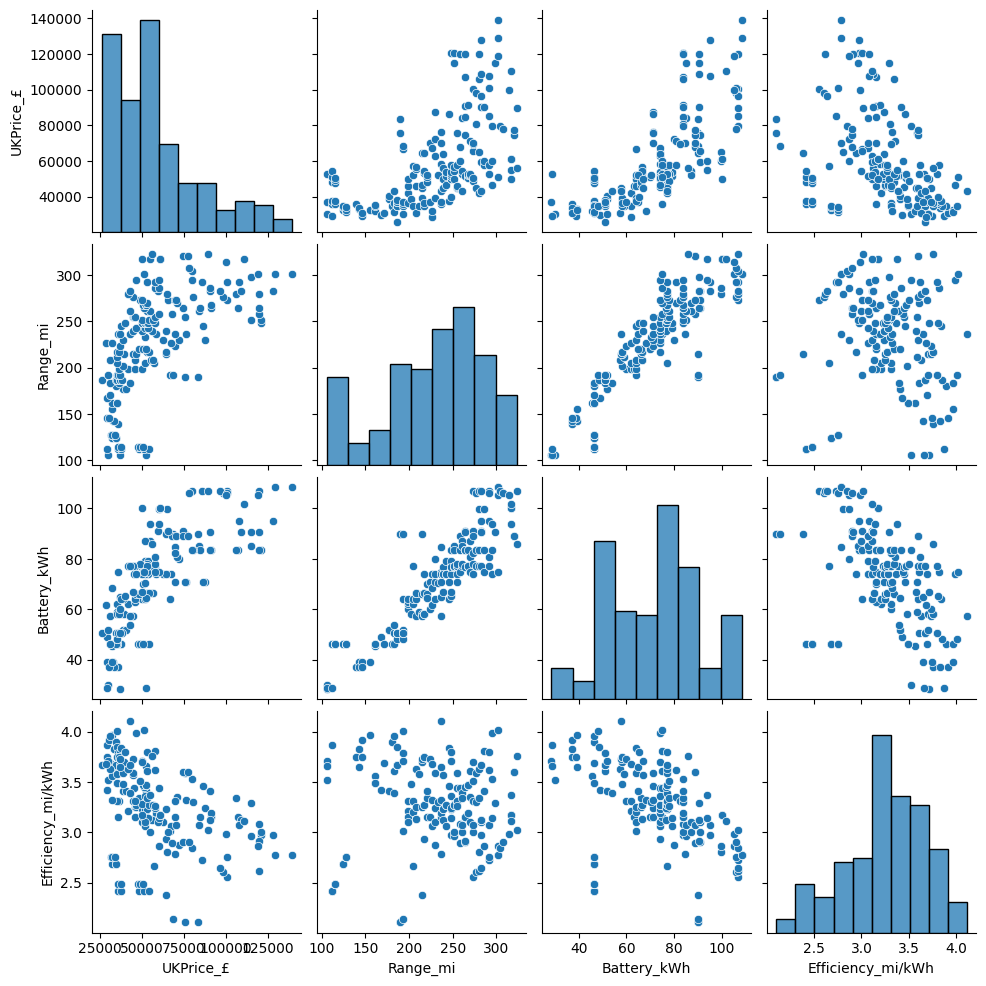

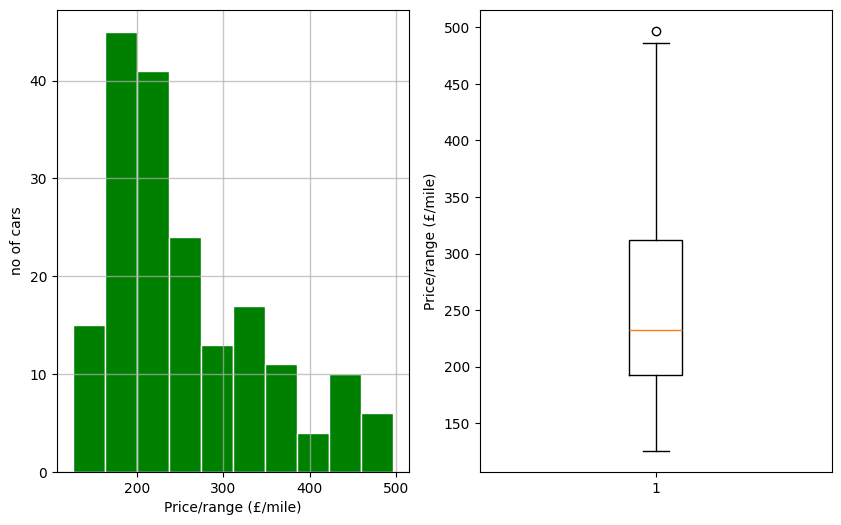

In [30]:
# recap of correlation matrix before removing outliers
print("Recap of correlation matrix before removing any outliers")
correlation_matrix = df_ecars[['UKPrice_£','Range_mi','Battery_kWh','Efficiency_mi/kWh']].corr(method='pearson')
print(f"{correlation_matrix.round(3)}\n")

df_ecars = df_ecars.drop(df_ecars[df_ecars['Range_mi'] > 325].index)
df_ecars

# correlation matrix before removing outliers
print("Recap of correlation matrix after removing range outliers but before removing cost/mi outliers")
correlation_matrix = df_ecars[['UKPrice_£','Range_mi','Battery_kWh','Efficiency_mi/kWh']].corr(method='pearson')
print(f"{correlation_matrix.round(3)}\n")

#removal of Pricepermilerange outliers
df_ecars = df_ecars.drop(df_ecars[df_ecars['Pricepermilerange'] > 500].index)

# revised correlation matrix and pairplot after removing outliers
print("Revised correlation matrix and pairplot after removing cost/mi outliers")
correlation_matrix = df_ecars[['UKPrice_£','Range_mi','Battery_kWh','Efficiency_mi/kWh']].corr(method='pearson')
print(f"{correlation_matrix.round(3)}\n")

#check number of records after removing all outliers
print(f"\nshape of df_ecars after removing all outliers: {df_ecars.shape}")

sns.pairplot(data=df_ecars[['UKPrice_£','Range_mi','Battery_kWh','Efficiency_mi/kWh']])
plt.show()


#revised histogram and boxplot of Pricepermilerange after removing outliers
plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
plt.hist(df_ecars['Pricepermilerange'], bins=10, color='green', edgecolor='white')
plt.xlabel("Price/range (£/mile)")
plt.ylabel("no of cars")
plt.grid(True, which='both', linestyle='-', linewidth=1, alpha=0.7)
plt.subplot(1,2,2)
plt.boxplot(x=df_ecars['Pricepermilerange'])
plt.ylabel("Price/range (£/mile)")
plt.show()

The correlation indices between price and range and price and battery size reduced slightly after removing the >325mile range outliers but increased significantly following the removal of the >£500/mi range outliers.  The high correlation index between range and battery size reduced very slightly. 

The pairplots after removing all outliers still visually reflect the fairly high correlation index between range and battery size (0.887), but such correlations between price and range or price and battery size are still not very high (0.585 and 0.756 respectively) as seen visually so I felt that calculating the price for each archetype based on bin averages would be more accurate than using linear regression and calculating based on average range. Clearly this is the case for efficiency.  And despute the high correlation index it seemed more consistent and possibly still more accurate to base battery size on the average in each bin rather than a linear regression formula on average range.  

I therefore calculated the average car price, battery size and efficiency for cars in each of the 9 range bins below also, giving each bin an index from 1 to 9.
The archetype car in each bin has these averages and such a car will be suitable for a user with a mileage range requirement which is at the bottom end of each range bin.

# Section 2 Cost and CO2 calculations

## Section 2.1 Creation of Ecar archetypes.

In [31]:
#I added code below to calculate average archetype cars in 9 range bins OVS_ID suitable rounding to reduce clutter and computational load.

df_ecars['Range_bin'] = pd.cut(df_ecars['Range_mi'], bins=range(100, 400, 25)).astype('string')
df_ecars['Range_min'] = df_ecars['Range_bin'].str.split(',').str[0].str.replace('(', '').astype('Int64')
df_ecars['Range_max'] = df_ecars['Range_bin'].str.split(',').str[1].str.replace(']', '').astype('Int64')
df_ecars[['Range_min', 'Range_max']]

df_ecar_archetypes = pd.DataFrame()
df_ecar_archetypes['Range_min'] = df_ecars[['Range_min']].groupby(df_ecars['Range_bin']).first()
df_ecar_archetypes['Range_max'] = df_ecars[['Range_max']].groupby(df_ecars['Range_bin']).first()
df_ecar_archetypes['Range_bin'] = df_ecar_archetypes['Range_min'].astype('string') + '-' + df_ecar_archetypes['Range_max'].astype('string')
df_ecar_archetypes['ecar_count'] = df_ecars['ecarindex'].groupby(df_ecars['Range_bin']).count()
df_ecar_archetypes['Range_avg'] = df_ecars['Range_mi'].groupby(df_ecars['Range_bin']).mean().round(1)
df_ecar_archetypes['UKPrice_£'] = df_ecars['UKPrice_£'].groupby(df_ecars['Range_bin']).mean().round(0).astype('Int64')
df_ecar_archetypes['Battery_kWh'] = df_ecars['Battery_kWh'].groupby(df_ecars['Range_bin']).mean().round(3)
df_ecar_archetypes['Efficiency_mi/kWh'] = df_ecars['Efficiency_mi/kWh'].groupby(df_ecars['Range_bin']).mean().round(3)
df_ecar_archetypes.reset_index(drop=True, inplace=True)
# df_ecars['ecarindex'] = df_ecars.index+1
df_ecar_archetypes['ArchetypeID'] = df_ecar_archetypes.index + 1
df_ecar_archetypes.set_index('ArchetypeID')
df_ecar_archetypes=df_ecar_archetypes[['ArchetypeID','Range_bin','Range_min', 'Range_max', 'ecar_count', 'Range_avg', 'UKPrice_£', 'Battery_kWh', 'Efficiency_mi/kWh']]
df_ecar_archetypes

,ArchetypeID,Range_bin,Range_min,Range_max,ecar_count,Range_avg,UKPrice_£,Battery_kWh,Efficiency_mi/kWh
0,1,100-125,100,125,17,113.9,41021,42.247,2.782
1,2,125-150,125,150,8,137.5,32495,41.125,3.392
2,3,150-175,150,175,6,163.1,32499,45.417,3.602
3,4,175-200,175,200,24,188.9,43304,57.854,3.388
4,5,200-225,200,225,23,213.7,47987,65.243,3.313
5,6,225-250,225,250,31,239.1,55902,72.381,3.327
6,7,250-275,250,275,36,262.6,69575,81.644,3.235
7,8,275-300,275,300,25,285.8,79887,90.076,3.221
8,9,300-325,300,325,16,312.6,83151,98.869,3.196


## Section 2.2 Creation of driver scenarios.

Below I have created a table with notional driver scenarions, with annual mileage requirements of 5,000, 7,500 ... 40,000 miles (15 different annual mileage scenarios) and mileage range requirements 60, 75, 90, ...up to 180 miles (9 mileage range scenarios) aligned with 60% of the minimum range for the Ecars in each of the 9 archetype bins above.

I assumed a user would require a car capable of meeting the mileage of a regular return trip to work or family etc. with a starting and finishing charge levels of 80% and 20% respectively to maximise battery longevity, thus their required range = 60% of the car's design range and only included user range mileage requirement scenarios up to 0.6*300 = 180 miles in line with the minimum range for the largest bin archetype car derived above.

So I started with nominal mileage requirements of 60, 75, 90 etc. but for some of the higher annual mileage requirements, the simple daily average exceeds these nominal amounts so they are unrealistic.  For example 40,000 miles = 110 miles/day so a range requirement of 60 miles is unrealistic. So in this case I increased the range requirements accordingly in the 'AdjustedRange_mi' column above.  I have shown the result for the 5,000 and 40,000 mileage scenarios below to demonstrate.

In [32]:
# Create a range of annual mileages from 2,500 to 40,000 in increments of 2,500 
# Nominal required ranges aligned with car range bins derived above with battery sizing based on 60% of nominal range to maximise battery longevity.
# and increased where annual average daily mileage exceeds nominal required range.
 
data = []
for a in range(1, 16):
    for r in range(0, 9):
        row = [2500+2500*a, 100*0.6+r*25*0.6]
        data.append(row)

df_ecarmodel = pd.DataFrame(data, columns=['Annual_mi','Nominal_required_range_mi'])
df_ecarmodel['Average_daily_mi'] = round(df_ecarmodel['Annual_mi']/365,1)
# Increase required range where annual average daily mileage exceeds nominal required range
df_ecarmodel['Use_range_mi'] = df_ecarmodel[['Nominal_required_range_mi', 'Average_daily_mi']].max(axis=1)
# Size battery such that only 60% of nominal range is used to maximise battery longevity (80-20% charge cycle)
df_ecarmodel['Required_Ecar_range_mi'] = round(df_ecarmodel['Use_range_mi'] /0.6,1)
pd.set_option('min_rows', 18) # to show all 5,000 and 40,000 mileage scenarios
df_ecarmodel


,Annual_mi,Nominal_required_range_mi,Average_daily_mi,Use_range_mi,Required_Ecar_range_mi
0,5000,60.0,13.7,60.0,100.0
1,5000,75.0,13.7,75.0,125.0
2,5000,90.0,13.7,90.0,150.0
3,5000,105.0,13.7,105.0,175.0
4,5000,120.0,13.7,120.0,200.0
5,5000,135.0,13.7,135.0,225.0
6,5000,150.0,13.7,150.0,250.0
7,5000,165.0,13.7,165.0,275.0
8,5000,180.0,13.7,180.0,300.0
...,...,...,...,...,...


This led to some combinations being repeated e.g. for 40,000 miles the notional mileage requirements of 60, 75, 90 and 105 miles all became 109.589 miles so I then removed the duplicates reducing the overall number of scenarios from 135 to 125 as below.  I also removed the working nominal mileage and average daily mileage columns as no longer required.

Also added an index for driving scenarios called 'DS_ID'

In [33]:
df_ecarmodel=df_ecarmodel.groupby(['Annual_mi','Use_range_mi', 'Required_Ecar_range_mi'], as_index=False)['Required_Ecar_range_mi'].first()
df_ecarmodel.sort_values(by=['Annual_mi', 'Use_range_mi'], ascending=[True, True], inplace=True)
df_ecarmodel['DS_ID'] = df_ecarmodel.index
# move DS_ID to left column
col = df_ecarmodel.pop('DS_ID')
df_ecarmodel.insert(0, 'DS_ID', col)
df_ecarmodel

,DS_ID,Annual_mi,Use_range_mi,Required_Ecar_range_mi
0,0,5000,60.0,100.0
1,1,5000,75.0,125.0
2,2,5000,90.0,150.0
3,3,5000,105.0,175.0
4,4,5000,120.0,200.0
5,5,5000,135.0,225.0
6,6,5000,150.0,250.0
7,7,5000,165.0,275.0
8,8,5000,180.0,300.0
...,...,...,...,...


## Section 2.2 Ecar driver & suitable Ecar archetypes.

Below I expanded the ecar model table by cross multiplying with the ecar archetype table to show all 9 ecar archetypes for each of the 125 driver scenarios. 125 * 9 = 1125 driver and Ecar archetype combinations.  I have also expanded no of visible columns to 20 as a lot will be required (though I will try to limit number viewed at each step), and dropped the ecar bin count and archetype min and max range columns which are no longer required and to avoid any possible confusion.

In [34]:
#Multiply with archetype car data to match each user mileage requirement scenario.
# 125 user scenarios * 9 Ecar archetypes = 1125 user scenario Ecar ombinations.
# Redundant columns dropped after cross merge.

pd.set_option('display.max_columns', 20)
df_ecarmodel = pd.merge(df_ecarmodel, df_ecar_archetypes, how='cross').drop(columns=['ecar_count', 'Range_min', 'Range_max'])
df_ecarmodel

,DS_ID,Annual_mi,Use_range_mi,Required_Ecar_range_mi,ArchetypeID,Range_bin,Range_avg,UKPrice_£,Battery_kWh,Efficiency_mi/kWh
0,0,5000,60.0,100.0,1,100-125,113.9,41021,42.247,2.782
1,0,5000,60.0,100.0,2,125-150,137.5,32495,41.125,3.392
2,0,5000,60.0,100.0,3,150-175,163.1,32499,45.417,3.602
3,0,5000,60.0,100.0,4,175-200,188.9,43304,57.854,3.388
4,0,5000,60.0,100.0,5,200-225,213.7,47987,65.243,3.313
5,0,5000,60.0,100.0,6,225-250,239.1,55902,72.381,3.327
6,0,5000,60.0,100.0,7,250-275,262.6,69575,81.644,3.235
7,0,5000,60.0,100.0,8,275-300,285.8,79887,90.076,3.221
8,0,5000,60.0,100.0,9,300-325,312.6,83151,98.869,3.196
...,...,...,...,...,...,...,...,...,...,...


However, not every car archetype has sufficient mileage range to meet the user's requirement. For example ecar archetypes 1-8 naturally each have an average range <300miles so are unsuitable for the scenarios with an adjusted required range of 180 miles which requires an ecar with a range of 300 miles to enable it to operate between charge levels of 80 and 20% (as in all but the last of the final 9 rows of the table displayed above)

So below I removed combinations where the car archetype's range is insufficient.  This reduced the number of feasible combinations to 587.

In [35]:
# Remove combinations with Ecars with insufficient range

df_ecarmodel= df_ecarmodel.drop(df_ecarmodel[df_ecarmodel['Range_avg'] < df_ecarmodel['Required_Ecar_range_mi']].index)
df_ecarmodel.sort_values(by=['Annual_mi', 'Use_range_mi','ArchetypeID'], ascending=[True, True,True],inplace=True)
df_ecarmodel

,DS_ID,Annual_mi,Use_range_mi,Required_Ecar_range_mi,ArchetypeID,Range_bin,Range_avg,UKPrice_£,Battery_kWh,Efficiency_mi/kWh
0,0,5000,60.0,100.0,1,100-125,113.9,41021,42.247,2.782
1,0,5000,60.0,100.0,2,125-150,137.5,32495,41.125,3.392
2,0,5000,60.0,100.0,3,150-175,163.1,32499,45.417,3.602
3,0,5000,60.0,100.0,4,175-200,188.9,43304,57.854,3.388
4,0,5000,60.0,100.0,5,200-225,213.7,47987,65.243,3.313
5,0,5000,60.0,100.0,6,225-250,239.1,55902,72.381,3.327
6,0,5000,60.0,100.0,7,250-275,262.6,69575,81.644,3.235
7,0,5000,60.0,100.0,8,275-300,285.8,79887,90.076,3.221
8,0,5000,60.0,100.0,9,300-325,312.6,83151,98.869,3.196
...,...,...,...,...,...,...,...,...,...,...


Check ecarmodel data column format.

In [36]:
df_ecarmodel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 587 entries, 0 to 1124
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DS_ID                   587 non-null    int64  
 1   Annual_mi               587 non-null    int64  
 2   Use_range_mi            587 non-null    float64
 3   Required_Ecar_range_mi  587 non-null    float64
 4   ArchetypeID             587 non-null    int64  
 5   Range_bin               587 non-null    string 
 6   Range_avg               587 non-null    float64
 7   UKPrice_£               587 non-null    Int64  
 8   Battery_kWh             587 non-null    float64
 9   Efficiency_mi/kWh       587 non-null    float64
dtypes: Int64(1), float64(5), int64(3), string(1)
memory usage: 51.0 KB


## Section 2.3 Global assumptions I applied to expand archetype info.

I derived the following general factors which I applied to existing archetype columns to form new columns here for ease of understanding and lookup (rather than just applying them globally within subsequent calculations), and with a view to refining these assumptions for each archetype in a future project refinement.

In [37]:
EquivNewPetroltoEcarPriceRatio=0.8 #New Ecar price as a ratio of equivalent new petrol car price
CheapNewPetrolCarPrice=15000 # Dacia
EcarUsedtoNewPriceRatio=10990/34945 #Used 4 year old Nissan Leaf
PetrolcarUsedtoNewPriceRatio=10990/34945 #Used 4 year old Nissan Leaf

# Adding archetype specific information to archetypes table
#Create new heading as there will also be used Ecar and petrol car prices 
# added then old column dropped rather than simply renaming so renamed column appears in desired order with new price columns
df_ecar_archetypes['EcarPrice_new']=df_ecar_archetypes['UKPrice_£']

#drop old redundant column
df_ecar_archetypes.drop(columns=['UKPrice_£'], inplace=True)

df_ecar_archetypes['EquivPetrolCarPrice_new']=round(df_ecar_archetypes['EcarPrice_new']*EquivNewPetroltoEcarPriceRatio,0).astype(np.int64)
df_ecar_archetypes['EcarPrice_used']=round(df_ecar_archetypes['EcarPrice_new']*EcarUsedtoNewPriceRatio,0).astype(np.int64)
df_ecar_archetypes['EquivPetrolCarPrice_used']=round(df_ecar_archetypes['EquivPetrolCarPrice_new']*PetrolcarUsedtoNewPriceRatio,0).astype(np.int64)

df_ecar_archetypes.info()
df_ecar_archetypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ArchetypeID               9 non-null      int64  
 1   Range_bin                 9 non-null      string 
 2   Range_min                 9 non-null      Int64  
 3   Range_max                 9 non-null      Int64  
 4   ecar_count                9 non-null      int64  
 5   Range_avg                 9 non-null      float64
 6   Battery_kWh               9 non-null      float64
 7   Efficiency_mi/kWh         9 non-null      float64
 8   EcarPrice_new             9 non-null      Int64  
 9   EquivPetrolCarPrice_new   9 non-null      int64  
 10  EcarPrice_used            9 non-null      int64  
 11  EquivPetrolCarPrice_used  9 non-null      int64  
dtypes: Int64(3), float64(3), int64(5), string(1)
memory usage: 1023.0 bytes


,ArchetypeID,Range_bin,Range_min,Range_max,ecar_count,Range_avg,Battery_kWh,Efficiency_mi/kWh,EcarPrice_new,EquivPetrolCarPrice_new,EcarPrice_used,EquivPetrolCarPrice_used
0,1,100-125,100,125,17,113.9,42.247,2.782,41021,32817,12901,10321
1,2,125-150,125,150,8,137.5,41.125,3.392,32495,25996,10219,8176
2,3,150-175,150,175,6,163.1,45.417,3.602,32499,25999,10221,8177
3,4,175-200,175,200,24,188.9,57.854,3.388,43304,34643,13619,10895
4,5,200-225,200,225,23,213.7,65.243,3.313,47987,38390,15092,12073
5,6,225-250,225,250,31,239.1,72.381,3.327,55902,44722,17581,14065
6,7,250-275,250,275,36,262.6,81.644,3.235,69575,55660,21881,17505
7,8,275-300,275,300,25,285.8,90.076,3.221,79887,63910,25124,20099
8,9,300-325,300,325,16,312.6,98.869,3.196,83151,66521,26151,20920


Below I have remerged the added columns in the expanded archetypes table with ecarmodel and checked format again.

In [38]:
df_ecarmodel = df_ecarmodel.merge(df_ecar_archetypes[['ArchetypeID','EcarPrice_new','EquivPetrolCarPrice_new','EcarPrice_used','EquivPetrolCarPrice_used']], on='ArchetypeID')
df_ecarmodel.sort_values(by=['Annual_mi', 'Use_range_mi','ArchetypeID'], ascending=[True, True,True],inplace=True)
df_ecarmodel.info()
df_ecarmodel

<class 'pandas.core.frame.DataFrame'>
Index: 587 entries, 0 to 586
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DS_ID                     587 non-null    int64  
 1   Annual_mi                 587 non-null    int64  
 2   Use_range_mi              587 non-null    float64
 3   Required_Ecar_range_mi    587 non-null    float64
 4   ArchetypeID               587 non-null    int64  
 5   Range_bin                 587 non-null    string 
 6   Range_avg                 587 non-null    float64
 7   UKPrice_£                 587 non-null    Int64  
 8   Battery_kWh               587 non-null    float64
 9   Efficiency_mi/kWh         587 non-null    float64
 10  EcarPrice_new             587 non-null    Int64  
 11  EquivPetrolCarPrice_new   587 non-null    int64  
 12  EcarPrice_used            587 non-null    int64  
 13  EquivPetrolCarPrice_used  587 non-null    int64  
dtypes: Int64(2), fl

,DS_ID,Annual_mi,Use_range_mi,Required_Ecar_range_mi,ArchetypeID,Range_bin,Range_avg,UKPrice_£,Battery_kWh,Efficiency_mi/kWh,EcarPrice_new,EquivPetrolCarPrice_new,EcarPrice_used,EquivPetrolCarPrice_used
0,0,5000,60.0,100.0,1,100-125,113.9,41021,42.247,2.782,41021,32817,12901,10321
8,0,5000,60.0,100.0,2,125-150,137.5,32495,41.125,3.392,32495,25996,10219,8176
28,0,5000,60.0,100.0,3,150-175,163.1,32499,45.417,3.602,32499,25999,10221,8177
62,0,5000,60.0,100.0,4,175-200,188.9,43304,57.854,3.388,43304,34643,13619,10895
112,0,5000,60.0,100.0,5,200-225,213.7,47987,65.243,3.313,47987,38390,15092,12073
177,0,5000,60.0,100.0,6,225-250,239.1,55902,72.381,3.327,55902,44722,17581,14065
257,0,5000,60.0,100.0,7,250-275,262.6,69575,81.644,3.235,69575,55660,21881,17505
352,0,5000,60.0,100.0,8,275-300,285.8,79887,90.076,3.221,79887,63910,25124,20099
462,0,5000,60.0,100.0,9,300-325,312.6,83151,98.869,3.196,83151,66521,26151,20920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


## Section 2.4 Global assumptions.

Below I have set some global (non archetype specific) constants, including arrays for efficiencies and maintenance costs to allow some user dashboard hi/low etc. selections.

Ideally efficiencies and maintenance costs would also be archetype specific, a possible future project refinement.

In [39]:
NightRate_hrs=7 #hours
ElecHomeNightRate=13.01 #p/kWh
ElecHomeDayRate=31.26 #p/kWh
ElecPublicChargerRate=52.00 #p/kWh
PetrolPrice=1.36 #£/litre
ElecCO2Intensity=0.20493 #kgCO2/kWh
PetrolCO2Intensity=2.34 #kg/litre

ChargingEfficiencies=[1,0.88] #1=High, 0.88=Avg
PetrolCarEfficiencies=[50,36] # MPG High=50, Avg=36

MaintenanceCostOptions = ['Low', 'Med', 'High']
EcarAnnualMaintcosts = [1022,1039,1139] # Low, Med, High
PetrolCarAnnualMaintcosts = [1012, 1497, 1668] # Low, Med, High

Elec rates are Economy 7 rates stated by Octopus energy on their website Incl VAT in Oct 2025
Historic Tariffs
Octopus 12M Fixed October 2025 v1
Eco7 Electricity

Public charging rate from Zapmap in Oct 2025
https://www.zap-map.com/ev-stats/charging-price-index

Petrol price based on experience but now reduced to £1.36 as listed on 
https://www.zap-map.com/ev-stats/charging-price-index
 
According to the link below, a typical Ecar charging efficiency =88% based on an example of a car with an 77kWh battery requiring 88kWh to charge from 0-100% State of Charge (SOC).  However, I am proposing to assume cars are generally charged from 20-80% SOC which is much more efficient so have assumed a high case of 100%.

https://www.which.co.uk/reviews/new-and-used-cars/article/electric-car-charging-guide/how-much-does-it-cost-to-charge-an-electric-car-a8f4g1o7JzXj

According to the link below the average petrol car efficiency =36MPG but a good new car has an efficiency of 50MPG.
https://www.bing.com/copilotsearch?q=average+mpg+petrol+cars+uk&FORM=CSSCOP

Elec CO2 intensity from From Greenhouse Gas Inventory.  Ideally would differentiate between night/day (lower/higher) But GHG reporting does not.

https://assets.publishing.service.gov.uk/media/6722566a3758e4604742aa1e/ghg-conversion-factors-2024-condensed_set__for_most_users__v1_1.xlsx
UK electricity'!$F$25

Petrol CO2 intensity from UK government DUKES 2024, Annex A, Page 11
https://assets.publishing.service.gov.uk/media/6846b54c5e9253957280613d/DUKES_2024_Annexes_A-J.pdf

Below I have developed a table with all combinations of variables which will have different high/low etc variations which the user will be able to select in the dashboard.  This will later be multiplied on the ecar model to allow cost savings to be calculated for every scenario for every annual mileage and mileage range requirement scenario.

## Section 2.5 Creation of other user selectable variable Scenarios.

Below I have created a table with variations on all other variables (i.e. other than driver annual mileage and range requirements) which I envisage likely to affect cost savings with discrete options being selectable by the user in the Power BI dashboard.

In [40]:
# loop through variables I intend to allow selectable variations in dashboard to create df_OVscenarios
#I expect 2*2*2*2*2*2*3=192 combinations
#to multiply with Ecarmodel later after trial scenario run below

HomeChargerCost_values=[]
HomeChargerCapacity_kW_values=[]
HomeCharge_Maxhrs_values=[]
loan_values=[]
interest_rate_values=[]
NeworUsed_values=[]
NeworUsedOptText_values=[]
AlternativePetrolCar_values=[]
AlternativePetrolCarOption_values=[]
MaxMileage_values=[]
TimePeriod_values=[]
LoanInterestRatio_values=[]
ChargingEfficiency_values=[]
PetrolCarEfficiency_values=[]
MaintenanceCostOption_values=[]
EcarAnnualMaintcost_values=[]
PetrolCarAnnualMaintcost_values=[]

for HomeCharger in range(2): #0=No,1=Yes
    HomeChargerCost=1000*HomeCharger
    HomeChargerCapacity_kW=7*HomeCharger
    HomeCharge_Maxhrs=HomeCharger*10 #hours
    HomeCharge_Night_Maxhrs=min(HomeCharge_Maxhrs, NightRate_hrs)
    
    for loan in range(2): #0=No loan, 1=Loan
        interest_rate=0 if loan==0 else 0.075
        
        for NeworUsed in range(2): #0=New, 1=Used
            NeworUsedOption='New' if NeworUsed==0 else '4YearOldUsed'
            MaxMileage=200000 if NeworUsed==0 else 100000
            TimePeriod=8 if NeworUsed==0 else 4 #years
            LoanInterestRatio=0 if(loan==0) else (TimePeriod*interest_rate/(1-(1+interest_rate)**(-TimePeriod)))-1
            
            for AlternativePetrolCar in range (2): #0=Equivalent, 1=cheapest
                AlternativePetrolCarOption = 'Equivalent' if AlternativePetrolCar==0 else 'Cheapest'
                for c in range (2):
                    ChargingEfficiency=ChargingEfficiencies[c]

                    for p in range (2):
                        PetrolCarEfficiency=PetrolCarEfficiencies[p]

                        for m in range (3):

                            EcarAnnualMaintcost=EcarAnnualMaintcosts[m]
                            PetrolCarAnnualMaintcost=PetrolCarAnnualMaintcosts[m]
                            MaintenanceCostOption=MaintenanceCostOptions[m]

                            HomeChargerCost_values.append(HomeChargerCost)
                            HomeChargerCapacity_kW_values.append(HomeChargerCapacity_kW)
                            HomeCharge_Maxhrs_values.append(HomeCharge_Maxhrs)
                            loan_values.append(loan)
                            interest_rate_values.append(interest_rate)
                            NeworUsed_values.append(NeworUsed)
                            NeworUsedOptText_values.append(NeworUsedOption)
                            AlternativePetrolCar_values.append(AlternativePetrolCar)
                            AlternativePetrolCarOption_values.append(AlternativePetrolCarOption)
                            MaxMileage_values.append(MaxMileage)
                            TimePeriod_values.append(TimePeriod)
                            LoanInterestRatio_values.append(LoanInterestRatio)
                            ChargingEfficiency_values.append(ChargingEfficiency)
                            PetrolCarEfficiency_values.append(PetrolCarEfficiency)
                            MaintenanceCostOption_values.append(MaintenanceCostOption)
                            EcarAnnualMaintcost_values.append(EcarAnnualMaintcost)
                            PetrolCarAnnualMaintcost_values.append(PetrolCarAnnualMaintcost)

df_OVscenarios=pd.DataFrame([])

df_OVscenarios['HomeChargerCost']=HomeChargerCost_values
df_OVscenarios['HomeChargerCapacity_kW']=HomeChargerCapacity_kW_values
df_OVscenarios['HomeCharge_Maxhrs']=HomeCharge_Maxhrs_values
df_OVscenarios['Loan']=loan_values
df_OVscenarios['interest_rate']=interest_rate_values
df_OVscenarios['NeworUsed']=NeworUsed_values
df_OVscenarios['NeworUsedOptText']=NeworUsedOptText_values
df_OVscenarios['AlternativePetrolCar']=AlternativePetrolCar_values
df_OVscenarios['AlternativePetrolCarOption']=AlternativePetrolCarOption_values
df_OVscenarios['MaxMileage']=MaxMileage_values
df_OVscenarios['TimePeriod']=TimePeriod_values
df_OVscenarios['LoanInterestRatio']=LoanInterestRatio_values
df_OVscenarios['ChargingEfficiency']=ChargingEfficiency_values
df_OVscenarios['PetrolCarEfficiency']=PetrolCarEfficiency_values
df_OVscenarios['MaintenanceCostsOption']=MaintenanceCostOption_values
df_OVscenarios['EcarAnnualMaintcost']=EcarAnnualMaintcost_values
df_OVscenarios['PetrolCarAnnualMaintcost']=PetrolCarAnnualMaintcost_values

df_OVscenarios.reset_index(inplace=True)
df_OVscenarios.rename(columns={'index': 'OVS_ID'},inplace=True)

df_OVscenarios.info()
df_OVscenarios

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   OVS_ID                      192 non-null    int64  
 1   HomeChargerCost             192 non-null    int64  
 2   HomeChargerCapacity_kW      192 non-null    int64  
 3   HomeCharge_Maxhrs           192 non-null    int64  
 4   Loan                        192 non-null    int64  
 5   interest_rate               192 non-null    float64
 6   NeworUsed                   192 non-null    int64  
 7   NeworUsedOptText            192 non-null    object 
 8   AlternativePetrolCar        192 non-null    int64  
 9   AlternativePetrolCarOption  192 non-null    object 
 10  MaxMileage                  192 non-null    int64  
 11  TimePeriod                  192 non-null    int64  
 12  LoanInterestRatio           192 non-null    float64
 13  ChargingEfficiency          192 non

,OVS_ID,HomeChargerCost,HomeChargerCapacity_kW,HomeCharge_Maxhrs,Loan,interest_rate,NeworUsed,NeworUsedOptText,AlternativePetrolCar,AlternativePetrolCarOption,MaxMileage,TimePeriod,LoanInterestRatio,ChargingEfficiency,PetrolCarEfficiency,MaintenanceCostsOption,EcarAnnualMaintcost,PetrolCarAnnualMaintcost
0,0,0,0,0,0,0.000,0,New,0,Equivalent,200000,8,0.00000,1.00,50,Low,1022,1012
1,1,0,0,0,0,0.000,0,New,0,Equivalent,200000,8,0.00000,1.00,50,Med,1039,1497
2,2,0,0,0,0,0.000,0,New,0,Equivalent,200000,8,0.00000,1.00,50,High,1139,1668
3,3,0,0,0,0,0.000,0,New,0,Equivalent,200000,8,0.00000,1.00,36,Low,1022,1012
4,4,0,0,0,0,0.000,0,New,0,Equivalent,200000,8,0.00000,1.00,36,Med,1039,1497
5,5,0,0,0,0,0.000,0,New,0,Equivalent,200000,8,0.00000,1.00,36,High,1139,1668
6,6,0,0,0,0,0.000,0,New,0,Equivalent,200000,8,0.00000,0.88,50,Low,1022,1012
7,7,0,0,0,0,0.000,0,New,0,Equivalent,200000,8,0.00000,0.88,50,Med,1039,1497
8,8,0,0,0,0,0.000,0,New,0,Equivalent,200000,8,0.00000,0.88,50,High,1139,1668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


## Section 2.5 Creation of test scenario to assist development.

Below I have reduced the scenarios table to one of these 192 scenarios to test the results with a more manageable sample dataset as I subsequently develop the savings calculations.  I have a parallel spreadsheet to check these results against. Before reducing to this one scenario, I have made a copy of the full table to be restored later to examine all 192 scenarios.

In [41]:
# Find OVS_ID with selected test variables below and reduce scenarios table to this test scenario 
# to limit results data volume to help test savings calculation development 

TestOVS_ID=df_OVscenarios.index[(df_OVscenarios['HomeChargerCost']==1000)
    &(df_OVscenarios['HomeChargerCapacity_kW']==7)
    &(df_OVscenarios['Loan']==1)
    &(df_OVscenarios['NeworUsed']==0)
    &(df_OVscenarios['AlternativePetrolCar']==0)
    &(df_OVscenarios['ChargingEfficiency']==ChargingEfficiencies[0])
    &(df_OVscenarios['PetrolCarEfficiency']==PetrolCarEfficiencies[0])
    &(df_OVscenarios['EcarAnnualMaintcost']==EcarAnnualMaintcosts[1])
    &(df_OVscenarios['PetrolCarAnnualMaintcost']==PetrolCarAnnualMaintcosts[1])]
TestOVS_ID
TestOVS_ID=TestOVS_ID[0]

print(f"TestOVS_ID={TestOVS_ID}")

# Take a copy of the full scenarios table with all 192 rows for later restoration before reducing to the test row.
df_OVscenarios_all=df_OVscenarios

# Reduce to the test set row without renaming to enable testing in development of the functions which are defined to operate
# with the scenarios table with this name.  The scenarios table will be later restored to the full version which can then 
# be run in the functions developed below.

df_OVscenarios=df_OVscenarios[df_OVscenarios['OVS_ID'] == TestOVS_ID]

df_OVscenarios.info()
df_OVscenarios

TestOVS_ID=145
<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 145 to 145
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   OVS_ID                      1 non-null      int64  
 1   HomeChargerCost             1 non-null      int64  
 2   HomeChargerCapacity_kW      1 non-null      int64  
 3   HomeCharge_Maxhrs           1 non-null      int64  
 4   Loan                        1 non-null      int64  
 5   interest_rate               1 non-null      float64
 6   NeworUsed                   1 non-null      int64  
 7   NeworUsedOptText            1 non-null      object 
 8   AlternativePetrolCar        1 non-null      int64  
 9   AlternativePetrolCarOption  1 non-null      object 
 10  MaxMileage                  1 non-null      int64  
 11  TimePeriod                  1 non-null      int64  
 12  LoanInterestRatio           1 non-null      float64
 13  ChargingEfficiency       

,OVS_ID,HomeChargerCost,HomeChargerCapacity_kW,HomeCharge_Maxhrs,Loan,interest_rate,NeworUsed,NeworUsedOptText,AlternativePetrolCar,AlternativePetrolCarOption,MaxMileage,TimePeriod,LoanInterestRatio,ChargingEfficiency,PetrolCarEfficiency,MaintenanceCostsOption,EcarAnnualMaintcost,PetrolCarAnnualMaintcost
145,145,1000,7,10,1,0.075,0,New,0,Equivalent,200000,8,0.365816,1.0,50,Med,1039,1497


Below I have taken a current copy of the ecarmodel which I will multiply by the one test scenario table above to help develope the cost and CO2 savings steps then restore and multiply by with the full set of 192 scenarios.

In [42]:
df_ecarmodel_presavingcalcs=df_ecarmodel

Development of functions for savings calculation steps below.

## Section 2.6 Define Cost and CO2 savings function steps.

Below I have developed the calculations which will ultimately calculate the cost and CO2 savings for each of the 587 combinations of suitable archetypes for the 125 driver scenarios (DS) and 192 other variable scenario (OVS), 
i.e. 587*192 = 112,704 combinations.

The final inputs and calculated values at the end of the last step comprise a large pandas dataframe totalling 76 columns including the main key output columns, the cost and CO2 savings results. It also includes 2 columns coded 0/1 if the archetype in each of the 112,704 combinations has or does not have the lowest total lifetime cost and the same for lowest price (=up front cost or total capital repayment in the case of a loan).

I incorporated the last 4 columns above into this 112,704 row table for simplicity rather than creating a seperate table of 125 * 192 = 24,000 rows. Any results can then be filtered on one of the final 2 columns in the same table.
I developed all of the necessary calculations in 14 steps each comprising a manageable group of column calculations to enable me to see, digest and check the results, without too much scrolling to the right.  I developed the calculations using just one of the 192 OV scenarios, i.e. 587 driver/archetype combinations to visualise results.  I had previously developed the calculations in an Excel spreadsheet to ideate the calculations and dashboard design, which then served as a useful cross check on results. The spreadsheet has the ability to replicate any of the 192 OV scenarios, but only calculates one OVS at a time to remain responsive and stable. As a future cross check I could add a VBA loop to the spreadsheet, generate all the reasults and compare with those of this notebook.

Once I had developed all 14 calculation steps, I created an overarching function to run most of steps sequentially (1 to 13), but I was unable to automate steps 0 and 14 as I would have liked as I could not get them to work when included within functions and called. These steps contain merge operations which may be the issue.

I then tested the semi automated calculation procedure again having automated steps 1-13, with the same test example obtaining the same result before applying it to all 192 OV scenarios.

Numerous other columns used or generated in the process contain key variables useful for dashboarding and further statistical analysis of the results. Many may no longer required so I kept them initially while developing the Power BI dashboard but later removed those which I would clearly not use again to reduce file size and for ease of filtering through less columns in the Power BI dashboard.

Having loaded results into Power BI and begun designing the main dashboard, I spotted an apparent anomaly which I was able to explain but also a major error which I corrected. I also later added the following information columns to facilitate more user frendly labelling of selectable slicer options, filtering and identification of optimum results:-

Various columns to more clearly label various user selectable variable options in a Power BI dashboard, e.g. whether selecting a new or 4 year old used car, which I had encoded 0/1 for ease of programming. I added these extra text columns here rather than renaming in Power BI.

In [43]:
pd.set_option('display.max_rows', 10) # to limit display to more manageable level in analysis below

In [44]:
#Step 0 Restore the ecarmodel table to pre savings calcs state, merge ecarmodel and DVscenario dataframes, 
# move OVS_ID to 4th column and sort by OVS_ID, DV ArchetypeID

#I was unable to get this code to work inside a defined function step0(df_ecarmodel), i.e. to be part of the sequence 
# prior to steps 1-12, so needs to be copied and pasted before the main steps 1-12 function with each run.
# I suspect it may be due to the merge functions below and will need to investigate if and how this can be overcome.
# The first part of step 0 below (restoring df_ecarmodel) is not necessary this time but will be in future runs 
# so included as the idea is to copy all the lines below the dashed line below

#---------------------------------------------------------------------------------------------------------------------------

#Step 0 
# Restore the ecarmodel table to pre savings calcs state.
df_ecarmodel=df_ecarmodel_presavingcalcs

# Merge ecarmodel and scenarios dataframes
df_ecarmodel=pd.merge(df_ecarmodel, df_OVscenarios, how='cross')

# move OVS_ID to 4th column
col = df_ecarmodel.pop('OVS_ID')
df_ecarmodel.insert(4, 'OVS_ID', col)

#sort by Annual_mi, Use_range_mi, ArchetypeID, OVS_ID
df_ecarmodel.sort_values(by=['OVS_ID','Annual_mi','Use_range_mi','ArchetypeID'], inplace=True)

In [45]:
#Step 1 calculate total up front cost for Ecar (incl homecharger if applicable) and petrol car.

# Both depend on whether new/used and petrol car also on whether assumed to be a rough equivalent (price=80% of Ecar) 
# or the cheapest (£15K new) which will still likely be able to meet even the highest range requirement option considered.
def step1(df_ecarmodel):
    df_ecarmodel['EcarPrice']=np.where(df_ecarmodel['NeworUsed'] ==0 , df_ecarmodel['EcarPrice_new'], df_ecarmodel['EcarPrice_used']).astype(np.int64)
    df_ecarmodel['Ecar+ChargerCost']=df_ecarmodel['EcarPrice']+df_ecarmodel['HomeChargerCost']
    
    df_ecarmodel['PetrolCarPrice']=(
        np.where(df_ecarmodel['AlternativePetrolCar'] ==0, np.where(df_ecarmodel['NeworUsed'] ==0 
        , df_ecarmodel['EquivPetrolCarPrice_new'], df_ecarmodel['EquivPetrolCarPrice_used'])
        ,CheapNewPetrolCarPrice*(np.where(df_ecarmodel['NeworUsed'] ==0 , 1
        ,PetrolcarUsedtoNewPriceRatio))).round(0).astype(np.int64)
    )

step1(df_ecarmodel)

df_ecarmodel.info()
df_ecarmodel[['Annual_mi','Use_range_mi', 'ArchetypeID', 'Range_avg','EcarPrice','Ecar+ChargerCost','PetrolCarPrice']]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587 entries, 0 to 586
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   DS_ID                       587 non-null    int64  
 1   Annual_mi                   587 non-null    int64  
 2   Use_range_mi                587 non-null    float64
 3   Required_Ecar_range_mi      587 non-null    float64
 4   OVS_ID                      587 non-null    int64  
 5   ArchetypeID                 587 non-null    int64  
 6   Range_bin                   587 non-null    string 
 7   Range_avg                   587 non-null    float64
 8   UKPrice_£                   587 non-null    Int64  
 9   Battery_kWh                 587 non-null    float64
 10  Efficiency_mi/kWh           587 non-null    float64
 11  EcarPrice_new               587 non-null    Int64  
 12  EquivPetrolCarPrice_new     587 non-null    int64  
 13  EcarPrice_used              587 non

,Annual_mi,Use_range_mi,ArchetypeID,Range_avg,EcarPrice,Ecar+ChargerCost,PetrolCarPrice
0,5000,60.0,1,113.9,41021,42021,32817
1,5000,60.0,2,137.5,32495,33495,25996
2,5000,60.0,3,163.1,32499,33499,25999
3,5000,60.0,4,188.9,43304,44304,34643
4,5000,60.0,5,213.7,47987,48987,38390
...,...,...,...,...,...,...,...
582,40000,150.0,8,285.8,79887,80887,63910
583,40000,150.0,9,312.6,83151,84151,66521
584,40000,165.0,8,285.8,79887,80887,63910
585,40000,165.0,9,312.6,83151,84151,66521


In [46]:
#Step 2 calculate number of car replacements required to meet mileage requirements in 8/4 years if new/used
def step2(df_ecarmodel):
    df_ecarmodel['Total_mi'] = df_ecarmodel['Annual_mi'] * df_ecarmodel['TimePeriod']
    df_ecarmodel['Replacements'] = np.where(df_ecarmodel['Total_mi'] > df_ecarmodel['MaxMileage'], np.ceil((df_ecarmodel['Total_mi'] - df_ecarmodel['MaxMileage']) / df_ecarmodel['MaxMileage']),0).astype(np.int64)
    df_ecarmodel['EcarReplacementcost'] = df_ecarmodel['EcarPrice'] * df_ecarmodel['Replacements']
    df_ecarmodel['PetrolCarReplacementcost'] = df_ecarmodel['PetrolCarPrice'] * df_ecarmodel['Replacements']

step2(df_ecarmodel)

print("Check replacements for all where total mileage > max mileage")
print(df_ecarmodel[['Annual_mi','Use_range_mi','Total_mi','MaxMileage','Replacements']].query('Total_mi > MaxMileage').describe())
print()
print("Check no replacements where total mileage <= max mileage")
print(df_ecarmodel[['Annual_mi','Use_range_mi','Total_mi','MaxMileage','Replacements']].query('Total_mi <= MaxMileage').describe())
df_ecarmodel[['Annual_mi','Use_range_mi','ArchetypeID','Total_mi','MaxMileage','Replacements','EcarReplacementcost','PetrolCarReplacementcost']]

Check replacements for all where total mileage > max mileage
          Annual_mi  Use_range_mi       Total_mi  MaxMileage  Replacements
count    183.000000    183.000000     183.000000       183.0         183.0
mean   33005.464481    117.312022  264043.715847    200000.0           1.0
std     4133.416845     26.979906   33067.334756         0.0           0.0
min    27500.000000     75.300000  220000.000000    200000.0           1.0
25%    30000.000000     95.900000  240000.000000    200000.0           1.0
50%    32500.000000    109.600000  260000.000000    200000.0           1.0
75%    37500.000000    135.000000  300000.000000    200000.0           1.0
max    40000.000000    180.000000  320000.000000    200000.0           1.0

Check no replacements where total mileage <= max mileage
          Annual_mi  Use_range_mi       Total_mi  MaxMileage  Replacements
count    404.000000    404.000000     404.000000       404.0         404.0
mean   14975.247525    100.302970  119801.980198    2000

,Annual_mi,Use_range_mi,ArchetypeID,Total_mi,MaxMileage,Replacements,EcarReplacementcost,PetrolCarReplacementcost
0,5000,60.0,1,40000,200000,0,0,0
1,5000,60.0,2,40000,200000,0,0,0
2,5000,60.0,3,40000,200000,0,0,0
3,5000,60.0,4,40000,200000,0,0,0
4,5000,60.0,5,40000,200000,0,0,0
...,...,...,...,...,...,...,...,...
582,40000,150.0,8,320000,200000,1,79887,63910
583,40000,150.0,9,320000,200000,1,83151,66521
584,40000,165.0,8,320000,200000,1,79887,63910
585,40000,165.0,9,320000,200000,1,83151,66521


In [47]:
#Step 3 calculate Ecar and petrol car replacement costs and loan interest on up front and any replacement costs.
def step3(df_ecarmodel):
    df_ecarmodel['EcarReplacementcost'] = df_ecarmodel['EcarPrice'] * df_ecarmodel['Replacements']
    df_ecarmodel['PetrolCarReplacementcost'] = df_ecarmodel['PetrolCarPrice'] * df_ecarmodel['Replacements']
    
    df_ecarmodel['EcarLoaninterest']=((df_ecarmodel['Ecar+ChargerCost']+df_ecarmodel['EcarReplacementcost'])*df_ecarmodel['LoanInterestRatio']).astype(float).round(0).astype(np.int64)
    df_ecarmodel['PetrolCarLoaninterest']=((df_ecarmodel['PetrolCarPrice']+df_ecarmodel['PetrolCarReplacementcost'])*df_ecarmodel['LoanInterestRatio']).astype(float).round(0).astype(np.int64)

#had to convert to float for codes above to allow me to round and convert to int64, unclear why

step3(df_ecarmodel)

df_ecarmodel.info()
df_ecarmodel[['Annual_mi','Use_range_mi','ArchetypeID','Ecar+ChargerCost','PetrolCarPrice','EcarReplacementcost','PetrolCarReplacementcost','LoanInterestRatio','EcarLoaninterest','PetrolCarLoaninterest']]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587 entries, 0 to 586
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   DS_ID                       587 non-null    int64  
 1   Annual_mi                   587 non-null    int64  
 2   Use_range_mi                587 non-null    float64
 3   Required_Ecar_range_mi      587 non-null    float64
 4   OVS_ID                      587 non-null    int64  
 5   ArchetypeID                 587 non-null    int64  
 6   Range_bin                   587 non-null    string 
 7   Range_avg                   587 non-null    float64
 8   UKPrice_£                   587 non-null    Int64  
 9   Battery_kWh                 587 non-null    float64
 10  Efficiency_mi/kWh           587 non-null    float64
 11  EcarPrice_new               587 non-null    Int64  
 12  EquivPetrolCarPrice_new     587 non-null    int64  
 13  EcarPrice_used              587 non

,Annual_mi,Use_range_mi,ArchetypeID,Ecar+ChargerCost,PetrolCarPrice,EcarReplacementcost,PetrolCarReplacementcost,LoanInterestRatio,EcarLoaninterest,PetrolCarLoaninterest
0,5000,60.0,1,42021,32817,0,0,0.365816,15372,12005
1,5000,60.0,2,33495,25996,0,0,0.365816,12253,9510
2,5000,60.0,3,33499,25999,0,0,0.365816,12254,9511
3,5000,60.0,4,44304,34643,0,0,0.365816,16207,12673
4,5000,60.0,5,48987,38390,0,0,0.365816,17920,14044
...,...,...,...,...,...,...,...,...,...,...
582,40000,150.0,8,80887,63910,79887,63910,0.365816,58814,46759
583,40000,150.0,9,84151,66521,83151,66521,0.365816,61202,48669
584,40000,165.0,8,80887,63910,79887,63910,0.365816,58814,46759
585,40000,165.0,9,84151,66521,83151,66521,0.365816,61202,48669


In [48]:
#Step 4 Calculate elec consumption per charge and check % of total Ecar capacity <=60% (as sized to allow 20-80% SOC op)
def step4(df_ecarmodel):
    df_ecarmodel["Used_battery_capacity_kWh"] = round(df_ecarmodel["Use_range_mi"]/df_ecarmodel["Efficiency_mi/kWh"],3)
    df_ecarmodel["Used_battery_capacity_share"] = round(df_ecarmodel["Used_battery_capacity_kWh"]/df_ecarmodel["Battery_kWh"],3)

step4(df_ecarmodel)

print(df_ecarmodel[['Used_battery_capacity_share']].describe()) #check never >60%

df_ecarmodel[['Annual_mi','Use_range_mi', 'ArchetypeID', 'Range_avg','Ecar+ChargerCost', 'Used_battery_capacity_kWh', 'Used_battery_capacity_share']]

       Used_battery_capacity_share
count                   587.000000
mean                      0.421819
std                       0.105302
min                       0.190000
25%                       0.341000
50%                       0.430000
75%                       0.514000
max                       0.589000


,Annual_mi,Use_range_mi,ArchetypeID,Range_avg,Ecar+ChargerCost,Used_battery_capacity_kWh,Used_battery_capacity_share
0,5000,60.0,1,113.9,42021,21.567,0.510
1,5000,60.0,2,137.5,33495,17.689,0.430
2,5000,60.0,3,163.1,33499,16.657,0.367
3,5000,60.0,4,188.9,44304,17.710,0.306
4,5000,60.0,5,213.7,48987,18.110,0.278
...,...,...,...,...,...,...,...
582,40000,150.0,8,285.8,80887,46.569,0.517
583,40000,150.0,9,312.6,84151,46.934,0.475
584,40000,165.0,8,285.8,80887,51.226,0.569
585,40000,165.0,9,312.6,84151,51.627,0.522


In [49]:
#Step 5 Calculate elec consumption and time split between home night, home day and public charging.
def step5(df_ecarmodel):
    df_ecarmodel['ChargeElec_kWh'] = round(df_ecarmodel['Used_battery_capacity_kWh'] / df_ecarmodel['ChargingEfficiency'],3)
    df_ecarmodel['HomeCharge_hrs'] = np.where(HomeCharger==0, 0, np.minimum(df_ecarmodel['ChargeElec_kWh'] / df_ecarmodel['HomeChargerCapacity_kW'], df_ecarmodel['HomeCharge_Maxhrs']))
    #note I have not rounded above as doing so causes downstream errors
    df_ecarmodel['HomeCharge_Night_hrs'] = np.minimum(df_ecarmodel['HomeCharge_hrs'],HomeCharge_Night_Maxhrs)
    df_ecarmodel['HomeCharge_Day_hrs'] = df_ecarmodel['HomeCharge_hrs'] - df_ecarmodel['HomeCharge_Night_hrs']
step5(df_ecarmodel)
df_ecarmodel[['Annual_mi','Use_range_mi', 'ArchetypeID', 'ChargeElec_kWh','HomeCharge_hrs', 'HomeCharge_Night_hrs', 'HomeCharge_Day_hrs']]

,Annual_mi,Use_range_mi,ArchetypeID,ChargeElec_kWh,HomeCharge_hrs,HomeCharge_Night_hrs,HomeCharge_Day_hrs
0,5000,60.0,1,21.567,3.081000,3.081000,0.000000
1,5000,60.0,2,17.689,2.527000,2.527000,0.000000
2,5000,60.0,3,16.657,2.379571,2.379571,0.000000
3,5000,60.0,4,17.710,2.530000,2.530000,0.000000
4,5000,60.0,5,18.110,2.587143,2.587143,0.000000
...,...,...,...,...,...,...,...
582,40000,150.0,8,46.569,6.652714,6.652714,0.000000
583,40000,150.0,9,46.934,6.704857,6.704857,0.000000
584,40000,165.0,8,51.226,7.318000,7.000000,0.318000
585,40000,165.0,9,51.627,7.375286,7.000000,0.375286


In [50]:
#Step 6 Calculate elec consumption split between home night, home day and public charging.
def step6(df_ecarmodel):
    df_ecarmodel['Home_NightRate_kWh'] = df_ecarmodel['HomeCharge_Night_hrs'] * df_ecarmodel['HomeChargerCapacity_kW']
    df_ecarmodel['Home_DayRate_kWh'] = df_ecarmodel['HomeCharge_Day_hrs'] * df_ecarmodel['HomeChargerCapacity_kW']
    df_ecarmodel['Public_kWh'] = df_ecarmodel['Used_battery_capacity_kWh'] - df_ecarmodel['Home_NightRate_kWh'] - df_ecarmodel['Home_DayRate_kWh']

step6(df_ecarmodel)
df_ecarmodel[['Annual_mi','Use_range_mi', 'ArchetypeID', 'Home_NightRate_kWh', 'Home_DayRate_kWh', 'Public_kWh']]

# With the given inputs public kWh should always =0 but very small numbers seen in the tail. I'm unclear how the small rounding errors seen in the tail occur, but they are very small and not material to the analysis.
# I'm unclear how the small rounding errors seen in the tail occur so examined below.

,Annual_mi,Use_range_mi,ArchetypeID,Home_NightRate_kWh,Home_DayRate_kWh,Public_kWh
0,5000,60.0,1,21.567,0.000,0.000000e+00
1,5000,60.0,2,17.689,0.000,0.000000e+00
2,5000,60.0,3,16.657,0.000,0.000000e+00
3,5000,60.0,4,17.710,0.000,0.000000e+00
4,5000,60.0,5,18.110,0.000,0.000000e+00
...,...,...,...,...,...,...
582,40000,150.0,8,46.569,0.000,0.000000e+00
583,40000,150.0,9,46.934,0.000,0.000000e+00
584,40000,165.0,8,49.000,2.226,1.776357e-15
585,40000,165.0,9,49.000,2.627,-1.776357e-15


In [51]:
pd.DataFrame(df_ecarmodel['Public_kWh'].unique())

,0
0,0.000000e+00
1,-3.552714e-15
2,3.552714e-15
3,1.776357e-15
4,-1.776357e-15


So only 4 Public_kWh values are extremely small non-zero likely due to rounding errors.  Rounded to zero in first line below

In [52]:

#Step 7 Calculate avg elec p/kWh and p/mi
def step7(df_ecarmodel):
    df_ecarmodel['Public_kWh']= 0
    df_ecarmodel['NightRateShare']= (df_ecarmodel['Home_NightRate_kWh']/df_ecarmodel['Used_battery_capacity_kWh'])
    df_ecarmodel['DayRateShare']= (df_ecarmodel['Home_DayRate_kWh']/df_ecarmodel['Used_battery_capacity_kWh'])
    df_ecarmodel['PublicShare']= (df_ecarmodel['Public_kWh']/df_ecarmodel['Used_battery_capacity_kWh'])
    df_ecarmodel['AvgElec_p/kWh']=(ElecHomeNightRate*df_ecarmodel['NightRateShare'] + ElecHomeDayRate*df_ecarmodel['DayRateShare'] + ElecPublicChargerRate*df_ecarmodel['PublicShare'])
    df_ecarmodel['Elec_p/mi']=df_ecarmodel['AvgElec_p/kWh']/df_ecarmodel['Efficiency_mi/kWh']

print(f"ElecHomeNightRate, ElecHomeDayRate, ElecPublicChargerRate = {ElecHomeNightRate}, {ElecHomeDayRate}, {ElecPublicChargerRate} p/kWh respectively")
step7(df_ecarmodel)
df_ecarmodel[['Annual_mi','Use_range_mi', 'ArchetypeID','NightRateShare', 'DayRateShare', 'PublicShare','AvgElec_p/kWh','Elec_p/mi']]

ElecHomeNightRate, ElecHomeDayRate, ElecPublicChargerRate = 13.01, 31.26, 52.0 p/kWh respectively


,Annual_mi,Use_range_mi,ArchetypeID,NightRateShare,DayRateShare,PublicShare,AvgElec_p/kWh,Elec_p/mi
0,5000,60.0,1,1.000000,0.000000,0.0,13.010000,4.676492
1,5000,60.0,2,1.000000,0.000000,0.0,13.010000,3.835495
2,5000,60.0,3,1.000000,0.000000,0.0,13.010000,3.611882
3,5000,60.0,4,1.000000,0.000000,0.0,13.010000,3.840024
4,5000,60.0,5,1.000000,0.000000,0.0,13.010000,3.926954
...,...,...,...,...,...,...,...,...
582,40000,150.0,8,1.000000,0.000000,0.0,13.010000,4.039118
583,40000,150.0,9,1.000000,0.000000,0.0,13.010000,4.070713
584,40000,165.0,8,0.956546,0.043454,0.0,13.803045,4.285329
585,40000,165.0,9,0.949116,0.050884,0.0,13.938637,4.361276


In [53]:
#Step 8 Calculate petrol p/mi
def step8(df_ecarmodel):
    df_ecarmodel['Petrol_p/mi']=PetrolPrice / df_ecarmodel['PetrolCarEfficiency'] * 4.54*100

step8(df_ecarmodel)
print(f'PetrolPrice=£{PetrolPrice}/litre')
df_ecarmodel[['Annual_mi','Use_range_mi','ArchetypeID','PetrolCarEfficiency','Petrol_p/mi']]

PetrolPrice=£1.36/litre


,Annual_mi,Use_range_mi,ArchetypeID,PetrolCarEfficiency,Petrol_p/mi
0,5000,60.0,1,50,12.3488
1,5000,60.0,2,50,12.3488
2,5000,60.0,3,50,12.3488
3,5000,60.0,4,50,12.3488
4,5000,60.0,5,50,12.3488
...,...,...,...,...,...
582,40000,150.0,8,50,12.3488
583,40000,150.0,9,50,12.3488
584,40000,165.0,8,50,12.3488
585,40000,165.0,9,50,12.3488


In [54]:
#Step 9 calculate fuel costs
def step9(df_ecarmodel):
    
    df_ecarmodel['AnnualElecCost'] = df_ecarmodel['Elec_p/mi'] * df_ecarmodel['Annual_mi'] /100
    df_ecarmodel['AnnualPetrolCost'] = df_ecarmodel['Petrol_p/mi'] * df_ecarmodel['Annual_mi'] /100
    df_ecarmodel['TotalElecCost']= round(df_ecarmodel['AnnualElecCost'] * df_ecarmodel['TimePeriod'], 0).astype('Int64')
    df_ecarmodel['TotalPetrolCost']= round(df_ecarmodel['AnnualPetrolCost'] * df_ecarmodel['TimePeriod'], 0).astype('Int64')

    
    # df_ecarmodel['Interest'] = round(df_ecarmodel['UKPrice_£']*TotalInterestRatio,0).astype('Int64')

step9(df_ecarmodel)
df_ecarmodel[['Annual_mi','Use_range_mi','ArchetypeID','Elec_p/mi','Petrol_p/mi','AnnualElecCost', 'AnnualPetrolCost','TotalElecCost','TotalPetrolCost']]

,Annual_mi,Use_range_mi,ArchetypeID,Elec_p/mi,Petrol_p/mi,AnnualElecCost,AnnualPetrolCost,TotalElecCost,TotalPetrolCost
0,5000,60.0,1,4.676492,12.3488,233.824587,617.44,1871,4940
1,5000,60.0,2,3.835495,12.3488,191.774764,617.44,1534,4940
2,5000,60.0,3,3.611882,12.3488,180.594114,617.44,1445,4940
3,5000,60.0,4,3.840024,12.3488,192.001181,617.44,1536,4940
4,5000,60.0,5,3.926954,12.3488,196.347721,617.44,1571,4940
...,...,...,...,...,...,...,...,...,...
582,40000,150.0,8,4.039118,12.3488,1615.647314,4939.52,12925,39516
583,40000,150.0,9,4.070713,12.3488,1628.285357,4939.52,13026,39516
584,40000,165.0,8,4.285329,12.3488,1714.131580,4939.52,13713,39516
585,40000,165.0,9,4.361276,12.3488,1744.510281,4939.52,13956,39516


In [55]:
#Step 10 calculate tot maintenance costs and total overall costs for Ecar archetype 
def step10(df_ecarmodel):
    
    df_ecarmodel['TotalEcarMaintCost']=df_ecarmodel['TimePeriod']*df_ecarmodel['EcarAnnualMaintcost']
    df_ecarmodel['TotalEcarCost'] = df_ecarmodel['Ecar+ChargerCost'] +df_ecarmodel['EcarReplacementcost']+df_ecarmodel['EcarLoaninterest']+df_ecarmodel['TotalElecCost']+df_ecarmodel['TotalEcarMaintCost']

step10(df_ecarmodel)
df_ecarmodel[['Annual_mi','Use_range_mi','ArchetypeID','Ecar+ChargerCost','EcarReplacementcost','EcarLoaninterest','TotalElecCost','TotalEcarMaintCost','TotalEcarCost']]

,Annual_mi,Use_range_mi,ArchetypeID,Ecar+ChargerCost,EcarReplacementcost,EcarLoaninterest,TotalElecCost,TotalEcarMaintCost,TotalEcarCost
0,5000,60.0,1,42021,0,15372,1871,8312,67576
1,5000,60.0,2,33495,0,12253,1534,8312,55594
2,5000,60.0,3,33499,0,12254,1445,8312,55510
3,5000,60.0,4,44304,0,16207,1536,8312,70359
4,5000,60.0,5,48987,0,17920,1571,8312,76790
...,...,...,...,...,...,...,...,...,...
582,40000,150.0,8,80887,79887,58814,12925,8312,240825
583,40000,150.0,9,84151,83151,61202,13026,8312,249842
584,40000,165.0,8,80887,79887,58814,13713,8312,241613
585,40000,165.0,9,84151,83151,61202,13956,8312,250772


In [56]:
#Step 11 calculate tot maintenance costs and total overall costs for petrol alternative to Ecar archetype 
def step11(df_ecarmodel):
    
    df_ecarmodel['TotalPetrolCarMaintCost']=df_ecarmodel['TimePeriod']*df_ecarmodel['PetrolCarAnnualMaintcost']
    df_ecarmodel['TotalPetrolCarCost'] = df_ecarmodel['PetrolCarPrice'] +df_ecarmodel['PetrolCarReplacementcost']+df_ecarmodel['PetrolCarLoaninterest']+df_ecarmodel['TotalPetrolCost']+df_ecarmodel['TotalPetrolCarMaintCost']

step11(df_ecarmodel)
df_ecarmodel[['Annual_mi','Use_range_mi','ArchetypeID','PetrolCarPrice','PetrolCarReplacementcost','PetrolCarLoaninterest','TotalPetrolCost','TotalPetrolCarMaintCost','TotalPetrolCarCost']]

,Annual_mi,Use_range_mi,ArchetypeID,PetrolCarPrice,PetrolCarReplacementcost,PetrolCarLoaninterest,TotalPetrolCost,TotalPetrolCarMaintCost,TotalPetrolCarCost
0,5000,60.0,1,32817,0,12005,4940,11976,61738
1,5000,60.0,2,25996,0,9510,4940,11976,52422
2,5000,60.0,3,25999,0,9511,4940,11976,52426
3,5000,60.0,4,34643,0,12673,4940,11976,64232
4,5000,60.0,5,38390,0,14044,4940,11976,69350
...,...,...,...,...,...,...,...,...,...
582,40000,150.0,8,63910,63910,46759,39516,11976,226071
583,40000,150.0,9,66521,66521,48669,39516,11976,233203
584,40000,165.0,8,63910,63910,46759,39516,11976,226071
585,40000,165.0,9,66521,66521,48669,39516,11976,233203


In [57]:
#Step 12 calculate CO2 for Ecar archetype and petrol car alternative
def step12(df_ecarmodel):

    df_ecarmodel['AnnualElec_kWh'] = (df_ecarmodel['Annual_mi'] / df_ecarmodel['Efficiency_mi/kWh']/df_ecarmodel['ChargingEfficiency']).round(3)
    df_ecarmodel['AnnualPetrol_litres'] = (df_ecarmodel['Annual_mi'] / df_ecarmodel['PetrolCarEfficiency']*4.54).round(3)
    df_ecarmodel['AnnualElec_kgCO2']=df_ecarmodel['AnnualElec_kWh']*ElecCO2Intensity
    df_ecarmodel['AnnualPetrol_kgCO2']=df_ecarmodel['AnnualPetrol_litres']*PetrolCO2Intensity
    df_ecarmodel['TotalElec_TCO2']=(df_ecarmodel['AnnualElec_kgCO2']*df_ecarmodel['TimePeriod']/1000).round(3)
    df_ecarmodel['TotalPetrol_TCO2']=(df_ecarmodel['AnnualPetrol_kgCO2']*df_ecarmodel['TimePeriod']/1000).round(3)
step12(df_ecarmodel)

df_ecarmodel.info()
df_ecarmodel[['Annual_mi','Use_range_mi','ArchetypeID','AnnualElec_kWh','AnnualPetrol_litres','AnnualElec_kgCO2','AnnualPetrol_kgCO2','TotalElec_TCO2','TotalPetrol_TCO2']]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587 entries, 0 to 586
Data columns (total 70 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   DS_ID                        587 non-null    int64  
 1   Annual_mi                    587 non-null    int64  
 2   Use_range_mi                 587 non-null    float64
 3   Required_Ecar_range_mi       587 non-null    float64
 4   OVS_ID                       587 non-null    int64  
 5   ArchetypeID                  587 non-null    int64  
 6   Range_bin                    587 non-null    string 
 7   Range_avg                    587 non-null    float64
 8   UKPrice_£                    587 non-null    Int64  
 9   Battery_kWh                  587 non-null    float64
 10  Efficiency_mi/kWh            587 non-null    float64
 11  EcarPrice_new                587 non-null    Int64  
 12  EquivPetrolCarPrice_new      587 non-null    int64  
 13  EcarPrice_used      

,Annual_mi,Use_range_mi,ArchetypeID,AnnualElec_kWh,AnnualPetrol_litres,AnnualElec_kgCO2,AnnualPetrol_kgCO2,TotalElec_TCO2,TotalPetrol_TCO2
0,5000,60.0,1,1797.268,454.0,368.314131,1062.36,2.947,8.499
1,5000,60.0,2,1474.057,454.0,302.078501,1062.36,2.417,8.499
2,5000,60.0,3,1388.118,454.0,284.467022,1062.36,2.276,8.499
3,5000,60.0,4,1475.797,454.0,302.435079,1062.36,2.419,8.499
4,5000,60.0,5,1509.206,454.0,309.281586,1062.36,2.474,8.499
...,...,...,...,...,...,...,...,...,...
582,40000,150.0,8,12418.504,3632.0,2544.924025,8498.88,20.359,67.991
583,40000,150.0,9,12515.645,3632.0,2564.831130,8498.88,20.519,67.991
584,40000,165.0,8,12418.504,3632.0,2544.924025,8498.88,20.359,67.991
585,40000,165.0,9,12515.645,3632.0,2564.831130,8498.88,20.519,67.991


In [58]:
#Step 13 calculate cost and CO2 savings for elec Ecar archetypes vs petrol alternatives 

def step13(df_ecarmodel):
    df_ecarmodel['TotalEcarCostSaving']=df_ecarmodel['TotalPetrolCarCost']-df_ecarmodel['TotalEcarCost']
    df_ecarmodel['TotalEcarTCO2Saving']=df_ecarmodel['TotalPetrol_TCO2']-df_ecarmodel['TotalElec_TCO2']

step13(df_ecarmodel)
df_ecarmodel.info()
df_ecarmodel[['Annual_mi','Use_range_mi','ArchetypeID','TotalEcarCost','TotalPetrolCarCost','TotalEcarCostSaving','TotalElec_TCO2','TotalPetrol_TCO2','TotalEcarTCO2Saving']]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587 entries, 0 to 586
Data columns (total 72 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   DS_ID                        587 non-null    int64  
 1   Annual_mi                    587 non-null    int64  
 2   Use_range_mi                 587 non-null    float64
 3   Required_Ecar_range_mi       587 non-null    float64
 4   OVS_ID                       587 non-null    int64  
 5   ArchetypeID                  587 non-null    int64  
 6   Range_bin                    587 non-null    string 
 7   Range_avg                    587 non-null    float64
 8   UKPrice_£                    587 non-null    Int64  
 9   Battery_kWh                  587 non-null    float64
 10  Efficiency_mi/kWh            587 non-null    float64
 11  EcarPrice_new                587 non-null    Int64  
 12  EquivPetrolCarPrice_new      587 non-null    int64  
 13  EcarPrice_used      

,Annual_mi,Use_range_mi,ArchetypeID,TotalEcarCost,TotalPetrolCarCost,TotalEcarCostSaving,TotalElec_TCO2,TotalPetrol_TCO2,TotalEcarTCO2Saving
0,5000,60.0,1,67576,61738,-5838,2.947,8.499,5.552
1,5000,60.0,2,55594,52422,-3172,2.417,8.499,6.082
2,5000,60.0,3,55510,52426,-3084,2.276,8.499,6.223
3,5000,60.0,4,70359,64232,-6127,2.419,8.499,6.080
4,5000,60.0,5,76790,69350,-7440,2.474,8.499,6.025
...,...,...,...,...,...,...,...,...,...
582,40000,150.0,8,240825,226071,-14754,20.359,67.991,47.632
583,40000,150.0,9,249842,233203,-16639,20.519,67.991,47.472
584,40000,165.0,8,241613,226071,-15542,20.359,67.991,47.632
585,40000,165.0,9,250772,233203,-17569,20.519,67.991,47.472


In [59]:
#Step 14 
# Find archetype with lowest total Ecar cost for each driver and other variable scenario (DS and OVS) on each row.
# Incorporated into this table for simplicity rather than create a seperate 24000 row table.

#As with Step 0, unfortunately I was unable to define all below as a function Step14(df_ecarmodel):, I believe the merge function may be causing the issue.

# Archetype for each annual mi, range and scenario with min Total Ecar Cost
df_minTotalEcarCost=pd.DataFrame(df_ecarmodel.groupby(['Annual_mi', 'Use_range_mi','OVS_ID'])['TotalEcarCost'].min())
df_minTotalEcarCost=pd.merge(df_minTotalEcarCost,df_ecarmodel,how='left', on=['Annual_mi', 'Use_range_mi','OVS_ID','TotalEcarCost'])
df_minTotalEcarCost=df_minTotalEcarCost[['Annual_mi', 'Use_range_mi','OVS_ID','ArchetypeID']]
df_minTotalEcarCost.sort_values(by=['OVS_ID','Annual_mi', 'Use_range_mi'])

# Check results for min Total Ecar Cost
# print('MinTotalEcarCostinfo\n')
# df_minTotalEcarCost.info()
# print([df_minTotalEcarCost])

# Archetype for each annual mi, range and scenario with min Ecar price
df_minEcarPrice=pd.DataFrame(df_ecarmodel.groupby(['Annual_mi', 'Use_range_mi','OVS_ID'])['EcarPrice'].min())
df_minEcarPrice=pd.merge(df_minEcarPrice,df_ecarmodel,how='left', on=['Annual_mi', 'Use_range_mi','OVS_ID','EcarPrice'])
df_minEcarPrice=df_minEcarPrice[['Annual_mi', 'Use_range_mi','OVS_ID','ArchetypeID']]
df_minTotalEcarCost.sort_values(by=['OVS_ID','Annual_mi', 'Use_range_mi'])

# Check results for min Ecar Price
# print('\nMinEcarPriceinfo\n')
# df_minEcarPrice.info()
# print([df_minEcarPrice])

# Combine info on Archetypes for each annual mi, range and scenario with min tot and up front Ecar price
df_CheapestEcars=pd.DataFrame()
df_CheapestEcars=pd.merge(df_minTotalEcarCost,df_minEcarPrice,how='left', on=['Annual_mi', 'Use_range_mi','OVS_ID'])

# Check results
# print('\nCheapestEcarsinfo')
# df_CheapestEcars.info()
# print([df_CheapestEcars])

#Rename Archetype columns.
df_CheapestEcars.rename(columns={'ArchetypeID_x': 'ArchetypeID_minTotalCost','ArchetypeID_y': 'ArchetypeID_minPrice'},inplace=True)

# Check results now retitled (check I have correctly understood source of _x and _y and labelled correct way round)
# print('\nCheapestEcarsinfoArchetypeColumnsRetitled')

# df_CheapestEcars.info()
# print([df_CheapestEcars])

#Merge into main table
df_ecarmodel = df_ecarmodel.merge(df_CheapestEcars[['Annual_mi', 'Use_range_mi','OVS_ID','ArchetypeID_minTotalCost','ArchetypeID_minPrice']], on=['Annual_mi', 'Use_range_mi','OVS_ID'])

#Add columns which state if row archetype has lowest total Ecar cost or lowest Ecar price
df_ecarmodel['ArchetypeIsLowestTotalCost']=np.where(df_ecarmodel['ArchetypeID']==df_ecarmodel['ArchetypeID_minTotalCost'],1,0)
df_ecarmodel['ArchetypeIsLowestPrice']=np.where(df_ecarmodel['ArchetypeID']==df_ecarmodel['ArchetypeID_minPrice'],1,0)

# Check final result (only include this check when repeating the calculation steps below)
df_ecarmodel.info()
df_ecarmodel[['EcarPrice','PetrolCarPrice','TotalEcarCost','TotalPetrolCarCost','TotalElec_TCO2','TotalPetrol_TCO2']].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587 entries, 0 to 586
Data columns (total 76 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   DS_ID                        587 non-null    int64  
 1   Annual_mi                    587 non-null    int64  
 2   Use_range_mi                 587 non-null    float64
 3   Required_Ecar_range_mi       587 non-null    float64
 4   OVS_ID                       587 non-null    int64  
 5   ArchetypeID                  587 non-null    int64  
 6   Range_bin                    587 non-null    string 
 7   Range_avg                    587 non-null    float64
 8   UKPrice_£                    587 non-null    Int64  
 9   Battery_kWh                  587 non-null    float64
 10  Efficiency_mi/kWh            587 non-null    float64
 11  EcarPrice_new                587 non-null    Int64  
 12  EquivPetrolCarPrice_new      587 non-null    int64  
 13  EcarPrice_used      

,EcarPrice,PetrolCarPrice,TotalEcarCost,TotalPetrolCarCost,TotalElec_TCO2,TotalPetrol_TCO2
count,587.000000,587.000000,587.0,587.0,587.000000,587.000000
mean,64106.676320,51285.531516,132307.035775,125139.947189,10.316985,35.009053
std,17413.776974,13931.107308,57379.76581,51358.599107,5.132380,17.318003
min,32495.000000,25996.000000,55510.0,52422.0,2.276000,8.499000
25%,47987.000000,38390.000000,89158.0,85407.0,6.160000,21.247000
50%,69575.000000,55660.000000,123636.0,111614.0,10.136000,33.996000
75%,79887.000000,63910.000000,151756.0,151420.0,14.107000,48.868500
max,83151.000000,66521.000000,252217.0,233203.0,20.519000,67.991000


This concludes the model calculations.  We now have calculated every parameter necessary for the dashboards for a single combination of user selectable variables.

I have taken a copy of this result below to allow it to be checked against a rerun after automating the above steps as much as possible.

In [60]:
df_ecarmodel_scenariotestresult=df_ecarmodel

Below I have defined an overarching function to automate steps 1-12 of the savings calculations defined in functions above.
Unfortunately as stated above I was unable to encode steps 0 and 13 as functions and therefore include in this overarching function.  I suspect this may be because Steps 0 and 13 contain merge functions which do not appear to work when defined inside my wider functions then called. I do not know why and need to research this later when there is more time.  

For now I have manually paste the code for step 0 before and for step 13 after the SavingsCalcsSteps1-12 function below.

In [61]:
# Precede with Step 0:- 
# Restore the ecarmodel table to pre savings calcs state, merge ecarmodel and DVscenario dataframes, 
# move OVS_ID to 4th column and sort by OVS_ID, DV ArchetypeID

def SavingsCalcsSteps1to13(df_ecarmodel):
    
    step1(df_ecarmodel) #Calculate total up front cost for Ecar (incl homecharger if applicable) and petrol car.
    step2(df_ecarmodel) #Calculate number of car replacements required to meet mileage requirements in 8/4 years if new/used
    step3(df_ecarmodel) #Calculate Ecar and petrol car replacement costs and loan interest on up front and any replacement costs.
    step4(df_ecarmodel) #Calculate elec consumption per charge and check % of total Ecar capacity <=60% (as sized to allow 20-80% SOC op)
    step5(df_ecarmodel) #Calculate elec consumption and time split between home night, home day and public charging.
    step6(df_ecarmodel) #Calculate elec consumption split between home night, home day and public charging.
    step7(df_ecarmodel) #Calculate avg elec p/kWh and p/mi
    step8(df_ecarmodel) #Calculate petrol p/mi
    step9(df_ecarmodel) #Calculate fuel costs
    step10(df_ecarmodel)#Calculate tot maintenance costs and total overall costs for Ecar archetype 
    step11(df_ecarmodel)#Calculate tot maintenance costs and total overall costs for petrol alternative to Ecar archetype 
    step12(df_ecarmodel)#Calculate CO2 for Ecar archetype and petrol car alternative
    step13(df_ecarmodel)#Calculate cost and CO2 savings for elec Ecar archetypes vs petrol alternatives

# Follow with Step 14:-
# Find archetype with lowest total Ecar cost for each DS and OV scenario on each row.

## Section 2.7 Restore ecarmodel dataframe and rerun savings calculation prodecure to test.

In [62]:
# Step 0 

#Restore the ecarmodel table to it's state prior to savings calculations.
df_ecarmodel=df_ecarmodel_presavingcalcs

# Merge ecarmodel and scenarios dataframes
df_ecarmodel=pd.merge(df_ecarmodel, df_OVscenarios, how='cross')

# move OVS_ID to 4th column
col = df_ecarmodel.pop('OVS_ID')
df_ecarmodel.insert(4, 'OVS_ID', col)

#sort by Annual_mi, Use_range_mi, ArchetypeID, OVS_ID
df_ecarmodel.sort_values(by=['OVS_ID','Annual_mi','Use_range_mi','ArchetypeID'], inplace=True)

# Steps1-13 function
SavingsCalcsSteps1to13(df_ecarmodel)

#Step 14
# Find archetype with lowest total Ecar cost for each annual mileage, range and other variables 'Scenario' combi on each row.
# Add 2 columns to right of df_ecarmodel showing archetypeID on each row with lowest total Ecar cost and lowest price combination (0-9)
# Add 2 columns to right of df_ecarmodel showing if archetypeID costed on each row has lowest total Ecar cost or lowest price (1/0)

# Archetype for each annual mi, range and scenario with min Total Ecar Cost
df_minTotalEcarCost=pd.DataFrame(df_ecarmodel.groupby(['Annual_mi', 'Use_range_mi','OVS_ID'])['TotalEcarCost'].min())
df_minTotalEcarCost=pd.merge(df_minTotalEcarCost,df_ecarmodel,how='left', on=['Annual_mi', 'Use_range_mi','OVS_ID','TotalEcarCost'])
df_minTotalEcarCost=df_minTotalEcarCost[['Annual_mi', 'Use_range_mi','OVS_ID','ArchetypeID']]
df_minTotalEcarCost.sort_values(by=['OVS_ID','Annual_mi', 'Use_range_mi'])

# Archetype for each annual mi, range and scenario with min Ecar price
df_minEcarPrice=pd.DataFrame(df_ecarmodel.groupby(['Annual_mi', 'Use_range_mi','OVS_ID'])['EcarPrice'].min())
df_minEcarPrice=pd.merge(df_minEcarPrice,df_ecarmodel,how='left', on=['Annual_mi', 'Use_range_mi','OVS_ID','EcarPrice'])
df_minEcarPrice=df_minEcarPrice[['Annual_mi', 'Use_range_mi','OVS_ID','ArchetypeID']]
df_minTotalEcarCost.sort_values(by=['OVS_ID','Annual_mi', 'Use_range_mi'])

# Combine info on Archetypes for each annual mi, range and scenario with min tot and up front Ecar price
df_CheapestEcars=pd.DataFrame()
df_CheapestEcars=pd.merge(df_minTotalEcarCost,df_minEcarPrice,how='left', on=['Annual_mi', 'Use_range_mi','OVS_ID'])

#Rename Archetype columns.
df_CheapestEcars.rename(columns={'ArchetypeID_x': 'ArchetypeID_minTotalCost','ArchetypeID_y': 'ArchetypeID_minPrice'},inplace=True)

#Merge into main table
df_ecarmodel = df_ecarmodel.merge(df_CheapestEcars[['Annual_mi', 'Use_range_mi','OVS_ID','ArchetypeID_minTotalCost','ArchetypeID_minPrice']], on=['Annual_mi', 'Use_range_mi','OVS_ID'])

#Add columns which state if row archetype has lowest total Ecar cost or lowest Ecar price
df_ecarmodel['ArchetypeIsLowestTotalCost']=np.where(df_ecarmodel['ArchetypeID']==df_ecarmodel['ArchetypeID_minTotalCost'],1,0)
df_ecarmodel['ArchetypeIsLowestPrice']=np.where(df_ecarmodel['ArchetypeID']==df_ecarmodel['ArchetypeID_minPrice'],1,0)

# Check final result.
df_ecarmodel[['EcarPrice','PetrolCarPrice','TotalEcarCost','TotalPetrolCarCost','TotalElec_TCO2','TotalPetrol_TCO2']].describe()
# df_ecarmodel.info()

,EcarPrice,PetrolCarPrice,TotalEcarCost,TotalPetrolCarCost,TotalElec_TCO2,TotalPetrol_TCO2
count,587.000000,587.000000,587.0,587.0,587.000000,587.000000
mean,64106.676320,51285.531516,132307.035775,125139.947189,10.316985,35.009053
std,17413.776974,13931.107308,57379.76581,51358.599107,5.132380,17.318003
min,32495.000000,25996.000000,55510.0,52422.0,2.276000,8.499000
25%,47987.000000,38390.000000,89158.0,85407.0,6.160000,21.247000
50%,69575.000000,55660.000000,123636.0,111614.0,10.136000,33.996000
75%,79887.000000,63910.000000,151756.0,151420.0,14.107000,48.868500
max,83151.000000,66521.000000,252217.0,233203.0,20.519000,67.991000


Below I have examined the results of the test scenario above obtained while developing all of the steps.  I see the results are identical suggesting all the steps have been correctly replicated.

In [63]:
df_ecarmodel_scenariotestresult[['EcarPrice','PetrolCarPrice','TotalEcarCost','TotalPetrolCarCost','TotalElec_TCO2','TotalPetrol_TCO2']].describe()
# df_ecarmodel_scenariotestresult.info()

,EcarPrice,PetrolCarPrice,TotalEcarCost,TotalPetrolCarCost,TotalElec_TCO2,TotalPetrol_TCO2
count,587.000000,587.000000,587.0,587.0,587.000000,587.000000
mean,64106.676320,51285.531516,132307.035775,125139.947189,10.316985,35.009053
std,17413.776974,13931.107308,57379.76581,51358.599107,5.132380,17.318003
min,32495.000000,25996.000000,55510.0,52422.0,2.276000,8.499000
25%,47987.000000,38390.000000,89158.0,85407.0,6.160000,21.247000
50%,69575.000000,55660.000000,123636.0,111614.0,10.136000,33.996000
75%,79887.000000,63910.000000,151756.0,151420.0,14.107000,48.868500
max,83151.000000,66521.000000,252217.0,233203.0,20.519000,67.991000


## Section 2.8 Restore and merge ecarmodel and Scenarios dataframes

Below, I have restored the scenarios table to the version with all 192 scenarios.

In [64]:
df_OVscenarios=df_OVscenarios_all

## Section 2.9 Run savings calculation prodecure for all scenarios.

I then ran the savings calculation procedure for all scenarios.

I expect there to be 587 * 192 = 112,704 rows and as in the example run, 72 columns.

In [65]:
#Step 0

# Restore the ecarmodel table to it's state prior to savings calculations.
df_ecarmodel=df_ecarmodel_presavingcalcs

# Merge ecarmodel and scenarios dataframes
df_ecarmodel=pd.merge(df_ecarmodel, df_OVscenarios, how='cross')

# move OVS_ID to 4th column
col = df_ecarmodel.pop('OVS_ID')
df_ecarmodel.insert(4, 'OVS_ID', col)

#sort by Annual_mi, Use_range_mi, ArchetypeID, OVS_ID
df_ecarmodel.sort_values(by=['OVS_ID','Annual_mi','Use_range_mi','ArchetypeID'], inplace=True)

# Steps1-13 function
SavingsCalcsSteps1to13(df_ecarmodel)

#Step 14

# Find archetype with lowest total Ecar cost for each annual mileage, range and other variables 'Scenario' combi on each row.
# Add 2 columns to right of df_ecarmodel showing archetypeID on each row with lowest total Ecar cost and lowest price combination (0-9)
# Add 2 columns to right of df_ecarmodel showing if archetypeID costed on each row has lowest total Ecar cost or lowest price (1/0)

# Archetype for each annual mi, range and scenario with min Total Ecar Cost
df_minTotalEcarCost=pd.DataFrame(df_ecarmodel.groupby(['Annual_mi', 'Use_range_mi','OVS_ID'])['TotalEcarCost'].min())
df_minTotalEcarCost=pd.merge(df_minTotalEcarCost,df_ecarmodel,how='left', on=['Annual_mi', 'Use_range_mi','OVS_ID','TotalEcarCost'])
df_minTotalEcarCost=df_minTotalEcarCost[['Annual_mi', 'Use_range_mi','OVS_ID','ArchetypeID']]
df_minTotalEcarCost.sort_values(by=['OVS_ID','Annual_mi', 'Use_range_mi'])

# Archetype for each annual mi, range and scenario with min Ecar price
df_minEcarPrice=pd.DataFrame(df_ecarmodel.groupby(['Annual_mi', 'Use_range_mi','OVS_ID'])['EcarPrice'].min())
df_minEcarPrice=pd.merge(df_minEcarPrice,df_ecarmodel,how='left', on=['Annual_mi', 'Use_range_mi','OVS_ID','EcarPrice'])
df_minEcarPrice=df_minEcarPrice[['Annual_mi', 'Use_range_mi','OVS_ID','ArchetypeID']]
df_minTotalEcarCost.sort_values(by=['OVS_ID','Annual_mi', 'Use_range_mi'])

# Combine info on Archetypes for each annual mi, range and scenario with min tot and up front Ecar price
df_CheapestEcars=pd.DataFrame()
df_CheapestEcars=pd.merge(df_minTotalEcarCost,df_minEcarPrice,how='left', on=['Annual_mi', 'Use_range_mi','OVS_ID'])

#Rename Archetype columns.
df_CheapestEcars.rename(columns={'ArchetypeID_x': 'ArchetypeID_minTotalCost','ArchetypeID_y': 'ArchetypeID_minPrice'},inplace=True)

#Merge into main table
df_ecarmodel = df_ecarmodel.merge(df_CheapestEcars[['Annual_mi', 'Use_range_mi','OVS_ID','ArchetypeID_minTotalCost','ArchetypeID_minPrice']], on=['Annual_mi', 'Use_range_mi','OVS_ID'])

#Add columns which state if row archetype has lowest total Ecar cost or lowest Ecar price
df_ecarmodel['ArchetypeIsLowestTotalCost']=np.where(df_ecarmodel['ArchetypeID']==df_ecarmodel['ArchetypeID_minTotalCost'],1,0)
df_ecarmodel['ArchetypeIsLowestPrice']=np.where(df_ecarmodel['ArchetypeID']==df_ecarmodel['ArchetypeID_minPrice'],1,0)

# Check final result.
df_ecarmodel[['EcarPrice','PetrolCarPrice','TotalEcarCost','TotalPetrolCarCost','TotalElec_TCO2','TotalPetrol_TCO2']].describe()
# df_ecarmodel.info()

,EcarPrice,PetrolCarPrice,TotalEcarCost,TotalPetrolCarCost,TotalElec_TCO2,TotalPetrol_TCO2
count,112704.000000,112704.000000,112704.0,112704.0,112704.000000,112704.000000
mean,42134.021295,21782.858603,74545.113714,60056.250213,8.265311,31.362242
std,25478.143941,19056.131553,54407.712964,44462.509183,5.170058,20.305218
min,10219.000000,4717.000000,14307.0,11235.0,1.138000,4.249000
25%,21881.000000,7311.250000,32521.0,29956.0,4.292500,16.998000
50%,29323.000000,15000.000000,58862.0,44697.0,7.214500,26.559000
75%,69575.000000,22189.000000,97889.0,79022.0,11.098750,42.494000
max,83151.000000,66521.000000,257285.0,249939.0,23.317000,94.432000


In [66]:
df_ecarmodel.info()
df_ecarmodel

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112704 entries, 0 to 112703
Data columns (total 76 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   DS_ID                        112704 non-null  int64  
 1   Annual_mi                    112704 non-null  int64  
 2   Use_range_mi                 112704 non-null  float64
 3   Required_Ecar_range_mi       112704 non-null  float64
 4   OVS_ID                       112704 non-null  int64  
 5   ArchetypeID                  112704 non-null  int64  
 6   Range_bin                    112704 non-null  string 
 7   Range_avg                    112704 non-null  float64
 8   UKPrice_£                    112704 non-null  Int64  
 9   Battery_kWh                  112704 non-null  float64
 10  Efficiency_mi/kWh            112704 non-null  float64
 11  EcarPrice_new                112704 non-null  Int64  
 12  EquivPetrolCarPrice_new      112704 non-null  int64  
 13 

,DS_ID,Annual_mi,Use_range_mi,Required_Ecar_range_mi,OVS_ID,ArchetypeID,Range_bin,Range_avg,UKPrice_£,Battery_kWh,...,AnnualElec_kgCO2,AnnualPetrol_kgCO2,TotalElec_TCO2,TotalPetrol_TCO2,TotalEcarCostSaving,TotalEcarTCO2Saving,ArchetypeID_minTotalCost,ArchetypeID_minPrice,ArchetypeIsLowestTotalCost,ArchetypeIsLowestPrice
0,0,5000,60.0,100.0,0,1,100-125,113.9,41021,42.247,...,368.314131,1062.36000,2.947,8.499,-3344,5.552,2,2,0,0
1,0,5000,60.0,100.0,0,2,125-150,137.5,32495,41.125,...,302.078501,1062.36000,2.417,8.499,-1639,6.082,2,2,1,1
2,0,5000,60.0,100.0,0,3,150-175,163.1,32499,45.417,...,284.467022,1062.36000,2.276,8.499,-1640,6.223,2,2,0,0
3,0,5000,60.0,100.0,0,4,175-200,188.9,43304,57.854,...,302.435079,1062.36000,2.419,8.499,-3801,6.080,2,2,0,0
4,0,5000,60.0,100.0,0,5,200-225,213.7,47987,65.243,...,309.281586,1062.36000,2.474,8.499,-4737,6.025,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112699,122,40000,150.0,250.0,191,8,275-300,285.8,79887,90.076,...,2891.959044,11803.99896,11.568,47.216,-28486,35.648,7,7,0,0
112700,122,40000,150.0,250.0,191,9,300-325,312.6,83151,98.869,...,2914.580652,11803.99896,11.658,47.216,-31077,35.558,7,7,0,0
112701,123,40000,165.0,275.0,191,8,275-300,285.8,79887,90.076,...,2891.959044,11803.99896,11.568,47.216,-29353,35.648,8,8,1,1
112702,123,40000,165.0,275.0,191,9,300-325,312.6,83151,98.869,...,2914.580652,11803.99896,11.658,47.216,-31944,35.558,8,8,0,0


## Section 2.10 Data Extraction for use in Power BI Dashboards

I have calculated all the data I envisage using in a Power BI dashboard so have extracted to a csv file.  
I may later add a step to remove unused columns to reduce file size, speed of data processing and ease of dashboard design filtering within Power BI.

In [67]:
df_ecarmodel.to_csv('Data/2_Processed/df_ecarmodel.csv')

## Section 2.11 Data Exploration to explain apparent anomalies seen in Power BI

In [68]:
# A Power BI slicer I set up indicated only 0s and no 1s for 'AlternativePetrolCar'
df_ecarmodel[['AlternativePetrolCar']].value_counts()

# I see 1s in result below and now realise it was because in Power BI I had filtered out 
# results where savings are <0 which is always case when 'AlternativePetrolCar' =1

AlternativePetrolCar
0                       56352
1                       56352
Name: count, dtype: int64

In [ ]:
# In original version I loaded into Power BI I observed that more cars seemed to save money with a loan than without which seems wrong
# as Ecars cost more than petrol cars to buy and where necessary, replace.  Something looked wrong!

df_ecarmodel['TotalEcarCostSaving'].groupby(df_ecarmodel['Loan']).describe()

# I found below that error was in formula applying a factor of 1 rather than 0 to up front and replacement costs 
# where there was no loan.  Now corrected my checks reflect what seems reasonable and match my spreadsheet results.

,count,mean,std,min,25%,50%,75%,max
Loan,,,,,,,,
0,56352.0,-10029.070273,25937.735908,-123738.0,-16463.0,-1771.0,5735.0,41794.0
1,56352.0,-18948.656729,36288.850865,-173966.0,-24448.0,-6122.0,3054.25,35457.0


In [70]:
# Find OVS_IDs for variation on test run (OVS_ID=145) but without a loan.

TestOVS_ID=df_OVscenarios.index[(df_OVscenarios['HomeChargerCost']==1000)
    &(df_OVscenarios['HomeChargerCapacity_kW']==7)
    &(df_OVscenarios['Loan']==0) # Changed from 1 to 0
    &(df_OVscenarios['NeworUsed']==0)
    &(df_OVscenarios['AlternativePetrolCar']==0)
    &(df_OVscenarios['ChargingEfficiency']==ChargingEfficiencies[0])
    &(df_OVscenarios['PetrolCarEfficiency']==PetrolCarEfficiencies[0])
    &(df_OVscenarios['EcarAnnualMaintcost']==EcarAnnualMaintcosts[1])
    &(df_OVscenarios['PetrolCarAnnualMaintcost']==PetrolCarAnnualMaintcosts[1])]

TestOVS_ID=TestOVS_ID[0]

print(f"TestOVS_ID={TestOVS_ID}")

TestOVS_ID=97


In [71]:
# df_test=df_ecarmodel[['OVS_ID','Loan','TotalEcarCostSaving']].query('OVS_ID == 145 or OVS_ID == 97')
df_test=df_ecarmodel.query('OVS_ID == 145 or OVS_ID == 97')
df_test
df_test['TotalEcarCostSaving'].groupby(df_test['Loan']).describe()

,count,mean,std,min,25%,50%,75%,max
Loan,,,,,,,,
0,587.0,-586.349233,6211.580945,-14017.0,-5215.0,-721.0,3738.0,14128.0
1,587.0,-7167.088586,8259.135055,-26550.0,-13376.0,-6302.0,-1196.5,10895.0


Customer annual mi and range scenario with highest Ecar cost saving calculated above, 
matches my Excel sheet with a loan (Loan=1) but did not with no loan (Loan=0) where my Excel sheet but now does having corrected code above.

In [72]:
# More detailed Checks
df_test_noloan=df_test.query('Loan==0')
print(df_test_noloan[['EcarPrice','PetrolCarPrice','TotalEcarCost','TotalPetrolCarCost','TotalElec_TCO2','TotalPetrol_TCO2']].describe())
df_test_noloan[['Annual_mi', 'Use_range_mi','OVS_ID','ArchetypeID','EcarPrice','PetrolCarPrice','TotalEcarCost','TotalPetrolCarCost','TotalElec_TCO2','TotalPetrol_TCO2']]

          EcarPrice  PetrolCarPrice  TotalEcarCost  TotalPetrolCarCost  \
count    587.000000      587.000000          587.0               587.0   
mean   64106.676320    51285.531516  100866.565588       100280.216354   
std    17413.776974    13931.107308   42678.214625         39741.80908   
min    32495.000000    25996.000000        43256.0             42912.0   
25%    47987.000000    38390.000000        68342.0             71317.0   
50%    69575.000000    55660.000000        94046.0             88376.0   
75%    79887.000000    63910.000000       116281.0            123333.0   
max    83151.000000    66521.000000       191015.0            184534.0   

       TotalElec_TCO2  TotalPetrol_TCO2  
count      587.000000        587.000000  
mean        10.316985         35.009053  
std          5.132380         17.318003  
min          2.276000          8.499000  
25%          6.160000         21.247000  
50%         10.136000         33.996000  
75%         14.107000         48.868500

,Annual_mi,Use_range_mi,OVS_ID,ArchetypeID,EcarPrice,PetrolCarPrice,TotalEcarCost,TotalPetrolCarCost,TotalElec_TCO2,TotalPetrol_TCO2
56939,5000,60.0,97,1,41021,32817,52204,49733,2.947,8.499
56940,5000,60.0,97,2,32495,25996,43341,42912,2.417,8.499
56941,5000,60.0,97,3,32499,25999,43256,42915,2.276,8.499
56942,5000,60.0,97,4,43304,34643,54152,51559,2.419,8.499
56943,5000,60.0,97,5,47987,38390,58870,55306,2.474,8.499
...,...,...,...,...,...,...,...,...,...,...
57521,40000,150.0,97,8,79887,63910,182011,179312,20.359,67.991
57522,40000,150.0,97,9,83151,66521,188640,184534,20.519,67.991
57523,40000,165.0,97,8,79887,63910,182799,179312,20.359,67.991
57524,40000,165.0,97,9,83151,66521,189570,184534,20.519,67.991


All agrees with my spreadsheet following correction to code above.

In [73]:
df_test_noloan[['Annual_mi','Use_range_mi','ArchetypeID','Ecar+ChargerCost','EcarReplacementcost','EcarLoaninterest','TotalElecCost','TotalEcarMaintCost','TotalEcarCost']]

,Annual_mi,Use_range_mi,ArchetypeID,Ecar+ChargerCost,EcarReplacementcost,EcarLoaninterest,TotalElecCost,TotalEcarMaintCost,TotalEcarCost
56939,5000,60.0,1,42021,0,0,1871,8312,52204
56940,5000,60.0,2,33495,0,0,1534,8312,43341
56941,5000,60.0,3,33499,0,0,1445,8312,43256
56942,5000,60.0,4,44304,0,0,1536,8312,54152
56943,5000,60.0,5,48987,0,0,1571,8312,58870
...,...,...,...,...,...,...,...,...,...
57521,40000,150.0,8,80887,79887,0,12925,8312,182011
57522,40000,150.0,9,84151,83151,0,13026,8312,188640
57523,40000,165.0,8,80887,79887,0,13713,8312,182799
57524,40000,165.0,9,84151,83151,0,13956,8312,189570


All agrees with my spreadsheet following correction to code above.

In [74]:
df_test_noloan[['Annual_mi','Use_range_mi','ArchetypeID','PetrolCarPrice','PetrolCarReplacementcost','PetrolCarLoaninterest','TotalPetrolCost','TotalPetrolCarMaintCost','TotalPetrolCarCost']]

,Annual_mi,Use_range_mi,ArchetypeID,PetrolCarPrice,PetrolCarReplacementcost,PetrolCarLoaninterest,TotalPetrolCost,TotalPetrolCarMaintCost,TotalPetrolCarCost
56939,5000,60.0,1,32817,0,0,4940,11976,49733
56940,5000,60.0,2,25996,0,0,4940,11976,42912
56941,5000,60.0,3,25999,0,0,4940,11976,42915
56942,5000,60.0,4,34643,0,0,4940,11976,51559
56943,5000,60.0,5,38390,0,0,4940,11976,55306
...,...,...,...,...,...,...,...,...,...
57521,40000,150.0,8,63910,63910,0,39516,11976,179312
57522,40000,150.0,9,66521,66521,0,39516,11976,184534
57523,40000,165.0,8,63910,63910,0,39516,11976,179312
57524,40000,165.0,9,66521,66521,0,39516,11976,184534


All agrees with my spreadsheet following correction to code above.

In [75]:
df_test_noloan[['Annual_mi','Use_range_mi','ArchetypeID','LoanInterestRatio']]

,Annual_mi,Use_range_mi,ArchetypeID,LoanInterestRatio
56939,5000,60.0,1,0.0
56940,5000,60.0,2,0.0
56941,5000,60.0,3,0.0
56942,5000,60.0,4,0.0
56943,5000,60.0,5,0.0
...,...,...,...,...
57521,40000,150.0,8,0.0
57522,40000,150.0,9,0.0
57523,40000,165.0,8,0.0
57524,40000,165.0,9,0.0


 Originally a factor of 1 had been applied should be 0 in Section 2.5 where loan interest ratio was calculated with following formula.  
 
 ```LoanInterestRatio=1 if(loan==0) else (TimePeriod*interest_rate/(1-(1+interest_rate)**(-TimePeriod)))-1```

 I have now corrected to 

 ```LoanInterestRatio=0 if(loan==0) else (TimePeriod*interest_rate/(1-(1+interest_rate)**(-TimePeriod)))-1```

ALso in Power BI slicers only seem to find one charging efficiency of 1 when there should be 2 options, 1 and 0.88.  Investigated below.

# Section 3 Further Data Exploration

In [76]:
df_ecarmodel[['ArchetypeIsLowestTotalCost','ArchetypeIsLowestPrice']].value_counts()

ArchetypeIsLowestTotalCost  ArchetypeIsLowestPrice
0                           0                         86784
1                           1                         22080
0                           1                          1920
1                           0                          1920
Name: count, dtype: int64

There are a total of 24000 rows marked as having either lowest total or lowest price. 
(125 user requirement scenarios * 192 other variable combination scenarios = 24000).  
For most combinations, the archetype with the lowest price also has the lowest total cost showing how significant the price is.

In [77]:
# Dashboard 1 graph for test variable Scenario
df_ecarmodel_ScenarioTotCostsaving=df_ecarmodel.query('ArchetypeIsLowestTotalCost == 1 and OVS_ID == 145')
# df_ecarmodel_ScenarioTotCostsaving.info()
df_ecarmodel_ScenarioTotCostsaving['TotalEcarCostSaving'].describe()
df_ecarmodel_ScenarioTotCostsaving

,DS_ID,Annual_mi,Use_range_mi,Required_Ecar_range_mi,OVS_ID,ArchetypeID,Range_bin,Range_avg,UKPrice_£,Battery_kWh,...,AnnualElec_kgCO2,AnnualPetrol_kgCO2,TotalElec_TCO2,TotalPetrol_TCO2,TotalEcarCostSaving,TotalEcarTCO2Saving,ArchetypeID_minTotalCost,ArchetypeID_minPrice,ArchetypeIsLowestTotalCost,ArchetypeIsLowestPrice
85117,0,5000,60.0,100.0,145,3,150-175,163.1,32499,45.417,...,284.467022,1062.36,2.276,8.499,-3084,6.223,3,2,1,0
85125,1,5000,75.0,125.0,145,3,150-175,163.1,32499,45.417,...,284.467022,1062.36,2.276,8.499,-3084,6.223,3,2,1,0
85132,2,5000,90.0,150.0,145,3,150-175,163.1,32499,45.417,...,284.467022,1062.36,2.276,8.499,-3084,6.223,3,3,1,1
85139,3,5000,105.0,175.0,145,4,175-200,188.9,43304,57.854,...,302.435079,1062.36,2.419,8.499,-6127,6.080,4,4,1,1
85145,4,5000,120.0,200.0,145,5,200-225,213.7,47987,65.243,...,309.281586,1062.36,2.474,8.499,-7440,6.025,5,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85687,120,40000,120.0,200.0,145,5,200-225,213.7,47987,65.243,...,2474.252890,8498.88,19.794,67.991,3032,48.197,5,5,1,1
85692,121,40000,135.0,225.0,145,6,225-250,239.1,55902,72.381,...,2463.841216,8498.88,19.711,67.991,-1239,48.280,6,6,1,1
85696,122,40000,150.0,250.0,145,7,250-275,262.6,69575,81.644,...,2533.910267,8498.88,20.271,67.991,-9065,47.720,7,7,1,1
85699,123,40000,165.0,275.0,145,8,275-300,285.8,79887,90.076,...,2544.924025,8498.88,20.359,67.991,-15542,47.632,8,8,1,1


In [78]:
#Dashboard 1 graph for test variable Scenario with non saving customer requirement cases removed
df_ecarmodel_ScenarioTotCostsaving=df_ecarmodel_ScenarioTotCostsaving.query('TotalEcarCostSaving > 0')
# df_ecarmodel_ScenarioTotCostsaving.info()
df_ecarmodel_ScenarioTotCostsaving['TotalEcarCostSaving'].describe()
# df_ecarmodel_ScenarioTotCostsaving

count           47.0
mean     4759.319149
std      3027.055055
min            410.0
25%           2299.0
50%           4166.0
75%           7259.0
max          10895.0
Name: TotalEcarCostSaving, dtype: Float64

ValueError: s must be a scalar, or float array-like with the same size as x and y

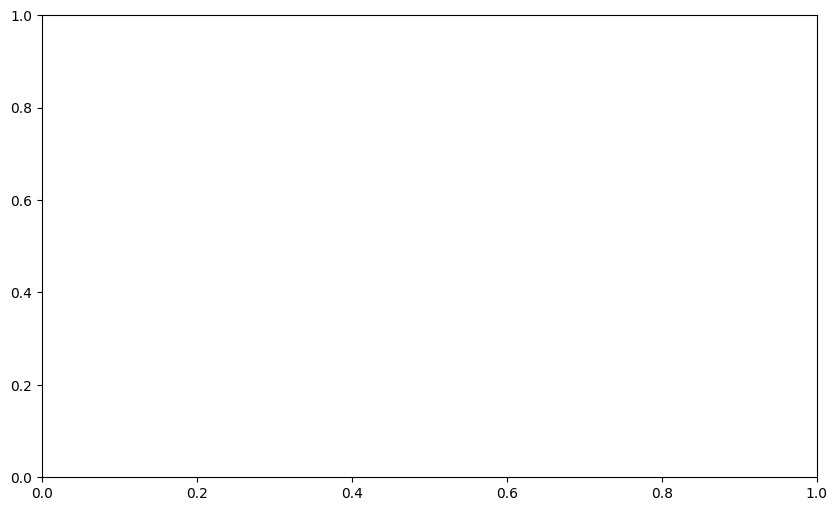

In [79]:
x=df_ecarmodel_ScenarioTotCostsaving['Use_range_mi']
y=df_ecarmodel_ScenarioTotCostsaving['Annual_mi']
sizes=df_ecarmodel_ScenarioTotCostsaving['TotalEcarCostSaving']
colors=df_ecarmodel_ScenarioTotCostsaving['TotalEcarCostSaving']

plt.figure(figsize=(10, 6))
scatter = plt.scatter(x, y, s=sizes, c=colors, cmap='Reds', alpha=0.7, edgecolors='w')
# scatter = plt.scatter(x, y, c=colors, cmap='Reds', alpha=0.7, edgecolors='w')

# Add labels and title
plt.title("Modelled Electric Car Cost Savings", fontsize=16)
plt.xlabel("Use_range_mi", fontsize=12)
plt.ylabel("Annual_mi", fontsize=12)

# Add a color bar to indicate the color mapping
colorbar = plt.colorbar(scatter)
colorbar.set_label("TotalEcarCostSaving", fontsize=12)

# Add a legend for marker size
# for size in [45, 195, 15]:
#     plt.scatter([], [], s=size, c='green', alpha=0.5, label=f"Size {size}")
# plt.legend(title="TotalEcarCostSaving", loc="upper right")


# Show the plot
plt.grid(True, linestyle='--', alpha=0.6)  # Add a grid for better readability
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

---

# Section x

Section 2 content

---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
  # create your folder here
  # os.makedirs(name='')
except Exception as e:
  print(e)
